
# Phase 1.1: Initial Data Inspection of German Credit Dataset

In [ ]:
# Import necessary libraries for data analysis
import pandas as pd
import numpy as np

# Import necessary libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# To filter unnecessary warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Import encoder tools
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Import necessary libraries for hypothesis testings
import scipy.stats
from scipy.stats import chi2_contingency, ttest_ind

# Import necessary libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

# Import necessary libraries for evaulating of model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Import necessary libraries for feature reduction
from sklearn.decomposition import PCA

# Import necessary libraries for model optimization
from sklearn.model_selection import GridSearchCV

In [ ]:
# Load the dataset
df_credit = pd.read_csv('credit.csv')

In [ ]:
# Preview the dataframe
df_credit.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [ ]:
# Preview the dataframe
df_credit.tail()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes
999,1 - 200 DM,45,critical,car,4576,100 - 500 DM,unemployed,3,4,27,none,own,1,skilled,1,no,no


In [ ]:
# Shape of dataframe
df_credit.shape

(1000, 17)

In [ ]:
# Preview the columns names
df_credit.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [ ]:
# Check data types
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [ ]:
# Check missing values
df_credit.isna().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [ ]:
# Check missing values
df_credit.isnull()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Summary statistics
df_credit.describe(include = 'all')

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000
unique,4,NaN,5,6,NaN,5,5,NaN,NaN,NaN,3,3,NaN,4,NaN,2,2
top,unknown,NaN,good,furniture/appliances,NaN,< 100 DM,1 - 4 years,NaN,NaN,NaN,none,own,NaN,skilled,NaN,no,no
freq,394,NaN,530,473,NaN,603,339,NaN,NaN,NaN,814,713,NaN,630,NaN,596,700
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,2.845000,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,1.103718,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,1.000000,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,2.000000,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,3.000000,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,4.000000,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN


In [ ]:
# Select numerical columns
numerical_columns = df_credit.select_dtypes(include=['int32', 'int64', 'float64'])
numerical_columns

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
0,6,1169,4,4,67,2,1
1,48,5951,2,2,22,1,1
2,12,2096,2,3,49,1,2
3,42,7882,2,4,45,1,2
4,24,4870,3,4,53,2,2
...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1
996,30,3857,4,4,40,1,1
997,12,804,4,4,38,1,1
998,45,1845,4,4,23,1,1


In [ ]:
# Select categorical columns
categorical_columns = df_credit.select_dtypes(include=['object', 'category'])
categorical_columns

,checking_balance,credit_history,purpose,savings_balance,employment_duration,other_credit,housing,job,phone,default
0,< 0 DM,critical,furniture/appliances,unknown,> 7 years,none,own,skilled,yes,no
1,1 - 200 DM,good,furniture/appliances,< 100 DM,1 - 4 years,none,own,skilled,no,yes
2,unknown,critical,education,< 100 DM,4 - 7 years,none,own,unskilled,no,no
3,< 0 DM,good,furniture/appliances,< 100 DM,4 - 7 years,none,other,skilled,no,no
4,< 0 DM,poor,car,< 100 DM,1 - 4 years,none,other,skilled,no,yes
...,...,...,...,...,...,...,...,...,...,...
995,unknown,good,furniture/appliances,< 100 DM,4 - 7 years,none,own,unskilled,no,no
996,< 0 DM,good,car,< 100 DM,1 - 4 years,none,own,management,yes,no
997,unknown,good,furniture/appliances,< 100 DM,> 7 years,none,own,skilled,no,no
998,< 0 DM,good,furniture/appliances,< 100 DM,1 - 4 years,none,other,skilled,yes,yes


Note: No missing values but found 'unknown' data in categorical columns of 'checking_balance' & 'savings_balance'

In [ ]:
# Preview list, number counts &  frequency counts of unique categories from categorical columns
for column in categorical_columns:
    nunique = df_credit[column].nunique()
    unique = df_credit[column].unique()
    vcounts = df_credit[column].value_counts()

    print('Column name: ', column)
    print('Number of unique category: ', nunique)
    print('List of unique category: ', unique)
    print('Frequency counts of ', vcounts)
    print()

Column name:  checking_balance
Number of unique category:  4
List of unique category:  ['< 0 DM' '1 - 200 DM' 'unknown' '> 200 DM']
Frequency counts of  checking_balance
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: count, dtype: int64

Column name:  credit_history
Number of unique category:  5
List of unique category:  ['critical' 'good' 'poor' 'perfect' 'very good']
Frequency counts of  credit_history
good         530
critical     293
poor          88
very good     49
perfect       40
Name: count, dtype: int64

Column name:  purpose
Number of unique category:  6
List of unique category:  ['furniture/appliances' 'education' 'car' 'business' 'renovations' 'car0']
Frequency counts of  purpose
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: count, dtype: int64

Column name:  savings_balance
Number of unique category:  5
List of uniq

# Phase 1.2: Data Preprocessing

In this phase,

    - handling missing data
    - encoding categorical columns,
    - detecting outliers,
    - feature engineering
    
will be performed to ensure data quality and suitability for subsequent analyses.

In [ ]:
# Create a copy dataset to preserve the original dataset
df_credit1 = df_credit.copy(deep=True)

In [ ]:
df_credit1.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


 ### 1.2.1 Handling Missing Data

 During phase (1.1), 'unknown' values are found within categorical columns 'checking_balance' and 'savings_balance'. These values will be processed in this phase.

In [ ]:
# Check missing values in the dataset
df_credit1.isna().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [ ]:
# Check 'unknown' values in the dataset
unknown_values = df_credit1 ==   'unknown'
unknown_values.sum()

checking_balance        394
months_loan_duration      0
credit_history            0
purpose                   0
amount                    0
savings_balance         183
employment_duration       0
percent_of_income         0
years_at_residence        0
age                       0
other_credit              0
housing                   0
existing_loans_count      0
job                       0
dependents                0
phone                     0
default                   0
dtype: int64

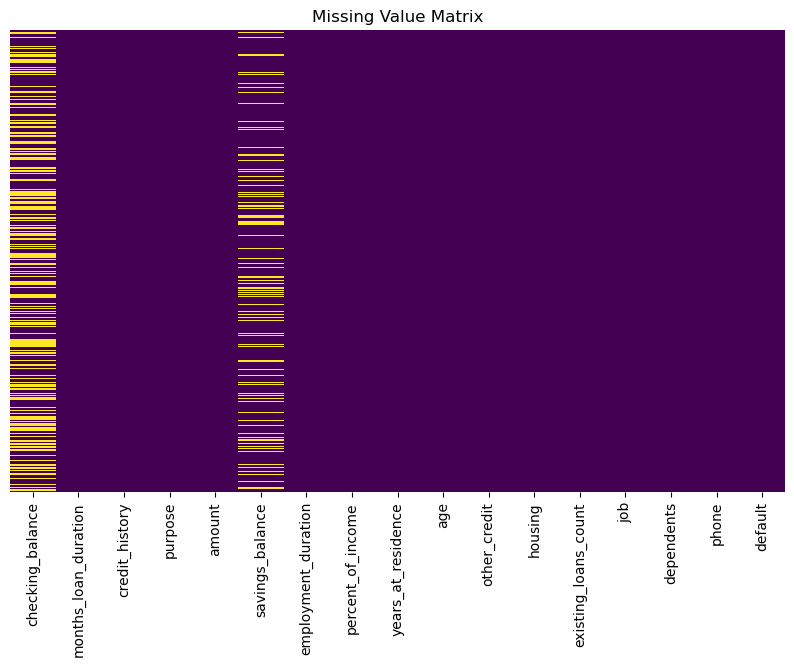

In [ ]:
# Create a missing value matrix to search 'unknown' category data
plt.figure(figsize=(10, 6))
sns.heatmap(df_credit1 == 'unknown', cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Value Matrix')
plt.show()

#### Unknown values from 'checking_balance' column

In [ ]:
# Check the 'unknown' value counts and percentage
def calculate_percentage(data):
    value_counts = data.value_counts()
    percentages = (value_counts / len(data)) * 100
    result = pd.DataFrame({'Count': value_counts, 'Percentage': percentages})
    return result

In [ ]:
data = df_credit1['checking_balance']
result = calculate_percentage(data)
print(result)

                  Count  Percentage
checking_balance                   
unknown             394        39.4
< 0 DM              274        27.4
1 - 200 DM          269        26.9
> 200 DM             63         6.3


In [ ]:
# Dropping rows with 'unknown' values
df_credit1.drop(df_credit1[df_credit1['checking_balance'] == 'unknown'].index, inplace=True)

In [ ]:
# Ordinal encoding for 'checking_balance' column
data = df_credit1['checking_balance'].values.reshape(-1, 1)
categories = [['< 0 DM', '1 - 200 DM', '> 200 DM']]
ordinal_encoder = OrdinalEncoder(categories=categories)
encoded_data = ordinal_encoder.fit_transform(data)
df_credit1['checking_balance_encoded'] = encoded_data.astype(np.int64)

In [ ]:
# Compare the original and encoded data
df_credit1[['checking_balance', 'checking_balance_encoded']].sample(5)

,checking_balance,checking_balance_encoded
77,1 - 200 DM,1
915,1 - 200 DM,1
581,1 - 200 DM,1
355,1 - 200 DM,1
471,< 0 DM,0


#### Unknown values from 'savings_balance' column

In [ ]:
data = df_credit1['savings_balance']
result = calculate_percentage(data)
print(result)

                 Count  Percentage
savings_balance                   
< 100 DM           412   67.986799
unknown             84   13.861386
100 - 500 DM        64   10.561056
500 - 1000 DM       23    3.795380
> 1000 DM           23    3.795380


In [ ]:
# Dropping rows with 'unknown' values
df_credit1.drop(df_credit1[df_credit1['savings_balance'] == 'unknown'].index, inplace=True)

In [ ]:
# Ordinal encoding for 'savings_balance' column
data = df_credit1['savings_balance'].values.reshape(-1, 1)
categories = [['< 100 DM', '100 - 500 DM', '500 - 1000 DM', '> 1000 DM']]
ordinal_encoder = OrdinalEncoder(categories=categories)
encoded_data = ordinal_encoder.fit_transform(data)
df_credit1['savings_balance_encoded'] = encoded_data.astype(np.int64)

In [ ]:
# Compare the original and encoded data
df_credit1[['savings_balance', 'savings_balance_encoded']].sample(5)

,savings_balance,savings_balance_encoded
653,100 - 500 DM,1
719,100 - 500 DM,1
849,< 100 DM,0
736,< 100 DM,0
530,< 100 DM,0


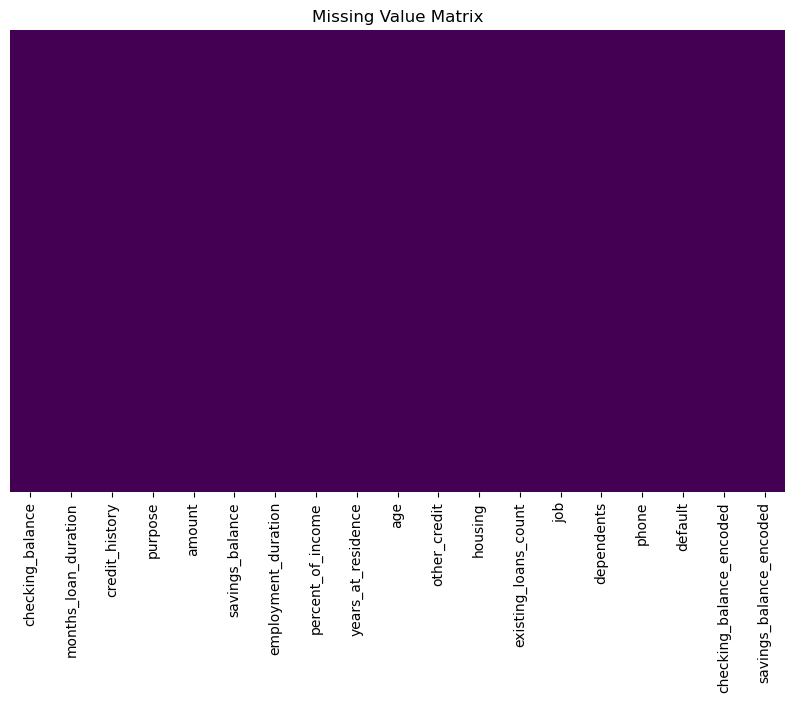

In [ ]:
# Create a missing value matrix to search 'unknown' category data
plt.figure(figsize=(10, 6))
sns.heatmap(df_credit1 == 'unknown', cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Value Matrix')
plt.show()

In [ ]:
# Check the shape to view how many rows have dropped
df_credit1.shape

(522, 19)

Note: 478 rows dropped after removing 'unknown' values

### 1.2.2 Encoding Categorical Columns

Encoding will be performed for the categorical columns for subsequent analysis.

    - Ordinal encoder: will be used to maintain the ordinal relationships within the data.
    - Label encoder: will be used if there is no ordinal relationship

In [ ]:
# Ordinal encoding for 'credit_history' column
data = df_credit1['credit_history'].values.reshape(-1, 1)
# Order of categories with ordinal relationship
categories = [['critical', 'poor', 'good', 'very good', 'perfect']]
ordinal_encoder = OrdinalEncoder(categories=categories)
encoded_data = ordinal_encoder.fit_transform(data)
df_credit1['credit_history_encoded'] = encoded_data.astype(np.int64)

In [ ]:
# Compare the original and encoded data
df_credit1[['credit_history', 'credit_history_encoded']].sample(5)

,credit_history,credit_history_encoded
576,good,2
87,good,2
535,critical,0
197,good,2
156,critical,0


In [ ]:
# Ordinal encoding for 'employment_duration' column
data = df_credit1['employment_duration'].values.reshape(-1, 1)
categories = [['unemployed', '< 1 year', '1 - 4 years', '4 - 7 years', '> 7 years']]
ordinal_encoder = OrdinalEncoder(categories=categories)
encoded_data = ordinal_encoder.fit_transform(data)
df_credit1['employment_duration_encoded'] = encoded_data.astype(np.int64)

In [ ]:
# Compare the original and encoded data
df_credit1[['employment_duration', 'employment_duration_encoded']].sample(5)

,employment_duration,employment_duration_encoded
458,< 1 year,1
540,< 1 year,1
407,< 1 year,1
699,> 7 years,4
29,> 7 years,4


In [ ]:
# Handling the typo error data within the 'purpose' column
df_credit1['purpose'].replace('car0', 'car', inplace=True)

In [ ]:
# Label encoding will be applied to the following columns since there is no significant ordinal relationship between their categories
label_encoder = LabelEncoder()
categorical_cols = ['purpose', 'other_credit', 'housing', 'job', 'phone', 'default']

for col in categorical_cols:
    df_credit1[col + '_encoded']  = label_encoder.fit_transform(df_credit1[col])

In [ ]:
# Compare the original and encoded data
categorical_cols_encoded = ['purpose_encoded', 'other_credit_encoded', 'housing_encoded', 'job_encoded', 'phone_encoded', 'default_encoded']

df_credit1[categorical_cols + categorical_cols_encoded ].sample(5)

,purpose,other_credit,housing,job,phone,default,purpose_encoded,other_credit_encoded,housing_encoded,job_encoded,phone_encoded,default_encoded
308,furniture/appliances,none,own,skilled,no,yes,3,1,1,1,0,1
111,education,none,rent,skilled,yes,no,2,1,2,1,1,0
273,furniture/appliances,none,own,skilled,no,yes,3,1,1,1,0,1
94,car,none,own,skilled,yes,no,1,1,1,1,1,0
819,furniture/appliances,bank,own,skilled,no,yes,3,0,1,1,0,1


In [ ]:
# Check if there is any duplicated data
df_credit1.duplicated().sum()

0

In [ ]:
df_credit1.sample(5)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,...,checking_balance_encoded,savings_balance_encoded,credit_history_encoded,employment_duration_encoded,purpose_encoded,other_credit_encoded,housing_encoded,job_encoded,phone_encoded,default_encoded
60,1 - 200 DM,9,good,business,1391,< 100 DM,1 - 4 years,2,1,27,...,1,0,2,2,0,0,1,1,1,0
771,< 0 DM,36,critical,education,8065,< 100 DM,1 - 4 years,3,2,25,...,0,0,0,2,2,1,1,0,1,1
195,1 - 200 DM,9,critical,education,1501,< 100 DM,> 7 years,2,3,34,...,1,0,0,4,2,1,1,0,1,1
23,1 - 200 DM,12,critical,car,1804,100 - 500 DM,< 1 year,3,4,44,...,1,1,0,1,1,1,1,1,0,0
472,< 0 DM,9,good,car,654,< 100 DM,1 - 4 years,4,3,28,...,0,0,2,2,1,1,1,3,0,1


In [ ]:
df_credit1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522 entries, 1 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   checking_balance             522 non-null    object
 1   months_loan_duration         522 non-null    int64 
 2   credit_history               522 non-null    object
 3   purpose                      522 non-null    object
 4   amount                       522 non-null    int64 
 5   savings_balance              522 non-null    object
 6   employment_duration          522 non-null    object
 7   percent_of_income            522 non-null    int64 
 8   years_at_residence           522 non-null    int64 
 9   age                          522 non-null    int64 
 10  other_credit                 522 non-null    object
 11  housing                      522 non-null    object
 12  existing_loans_count         522 non-null    int64 
 13  job                          522 non-nul

### 1.2.3 Feature Engineering & Transformations

In this phase,

         - outliers detection and transformations
         - new features creation before EDA      
for some of the numerical columns will be performed to ease the subsequent analysis.

#### 'months_loan_duration' column

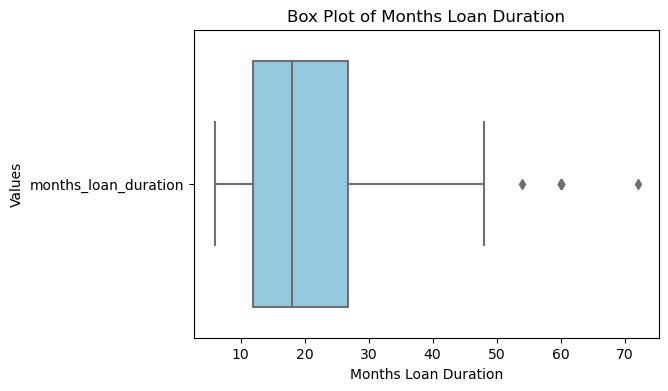

In [ ]:
# Box plot to detect outliers

data = df_credit1[['months_loan_duration']]

plt.figure(figsize=(6, 4))
sns.boxplot(data, orient="h", color='skyblue')
plt.xlabel('Months Loan Duration')
plt.ylabel('Values')
plt.title('Box Plot of Months Loan Duration')
plt.show()

In [ ]:
# Calculation of inner quartile range (IQR)
data = df_credit1['months_loan_duration']

q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 -q1

lower_limit = q1 - 2.0 * iqr
upper_limit = q3 + 2.0 * iqr
outliers = [x for x in data if x < lower_limit or x > upper_limit]

print('Q1: ', q1)
print('Q3: ', q3)
print('IQR: ', iqr)
print("Lower Limit: ", lower_limit)
print("Upper Limit: ", upper_limit)
print("Potential Outliers: ", outliers)

Q1:  12.0
Q3:  26.75
IQR:  14.75
Lower Limit:  -17.5
Upper Limit:  56.25
Potential Outliers:  [60, 60, 60, 72, 60, 60, 60]


In [ ]:
# Function to cap the outliers
def cap_outliers(df, col, lower_limit, upper_limit):
    df.loc[(df[col] < lower_limit), col] = lower_limit
    df.loc[(df[col] > upper_limit), col] = upper_limit

In [ ]:
cap_outliers(df_credit1, "months_loan_duration", lower_limit, upper_limit)

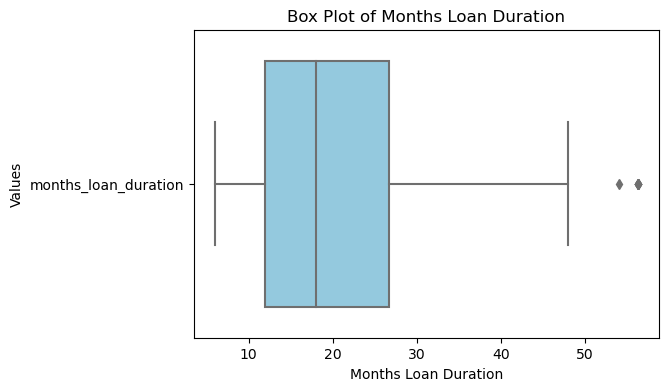

In [ ]:
# Box plot to detect outliers

data = df_credit1[['months_loan_duration']]

plt.figure(figsize = (6, 4))
sns.boxplot(data, orient="h", color='skyblue')
plt.xlabel('Months Loan Duration')
plt.ylabel('Values')
plt.title('Box Plot of Months Loan Duration')
plt.show()

In [ ]:
# Calculate maximum value for new feature creation
max_v = max(df_credit1['months_loan_duration'])
max_v

56.25

In [ ]:
# New categorical feature - 'loan_duration' for EDA

bins = [0, 12, 24, 36, max_v]
labels = ["< 1 year", "1 - 2 years", "2 - 3 years", "> 3 years"]

df_credit1['loan_duration'] = pd.cut(df_credit1['months_loan_duration'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
# Comparing original and new features
result = df_credit1[['months_loan_duration', 'loan_duration']].sample(5)
result

,months_loan_duration,loan_duration
806,6.0,< 1 year
472,9.0,< 1 year
832,45.0,> 3 years
73,42.0,> 3 years
999,45.0,> 3 years


#### 'amount' column

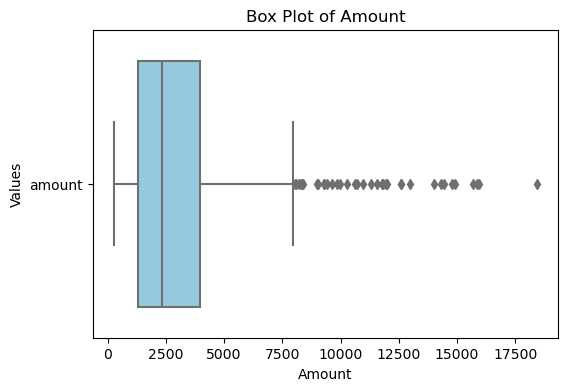

In [ ]:
# Box plot to detect outliers

data = df_credit1[['amount']]

plt.figure(figsize = (6, 4))
sns.boxplot(data, orient="h", color='skyblue')
plt.xlabel('Amount')
plt.ylabel('Values')
plt.title('Box Plot of Amount')
plt.show()

In [ ]:
# Calculation of inner quartile range (IQR)

data = df_credit1['amount']

q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 -q1

lower_limit = q1 - 3.5 * iqr
upper_limit = q3 + 3.5 * iqr
outliers = [x for x in data if x < lower_limit or x > upper_limit]

print('Q1: ', q1)
print('Q3: ', q3)
print('IQR: ', iqr)
print("Lower Limit: ", lower_limit)
print("Upper Limit: ", upper_limit)
print("Potential Outliers: ", outliers)

Q1:  1297.5
Q3:  3971.25
IQR:  2673.75
Lower Limit:  -8060.625
Upper Limit:  13329.375
Potential Outliers:  [14421, 15945, 14782, 14318, 14027, 15857, 15672, 18424, 14896]


In [ ]:
cap_outliers(df_credit1, "amount", lower_limit, upper_limit)

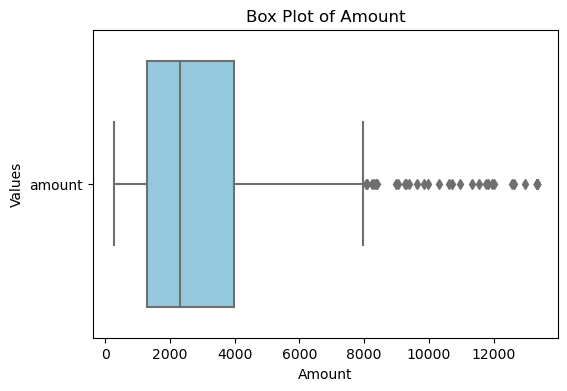

In [ ]:
# Box plot to detect outliers

data = df_credit1[['amount']]

plt.figure(figsize = (6, 4))
sns.boxplot(data, orient="h", color='skyblue')
plt.xlabel('Amount')
plt.ylabel('Values')
plt.title('Box Plot of Amount')
plt.show()

In [ ]:
# Calculate maximum value for new feature creation
max_v = max(df_credit1['amount'])
max_v

13329.375

In [ ]:
# New categorical feature - 'loan_amount' for EDA
bins = [0, 3000, 6000, 9000, 12000, max_v]
labels = ["< 3000", "3000 - 6000", "6000 - 9000", "9000 - 12000", "> 12000"]

df_credit1['loan_amount'] = pd.cut(df_credit1['amount'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
# Comparing original and new features
result = df_credit1[['amount', 'loan_amount']].sample(5)
result

,amount,loan_amount
930,1747.0,< 3000
543,2864.0,< 3000
585,2039.0,< 3000
457,3386.0,3000 - 6000
203,902.0,< 3000


#### 'age' column

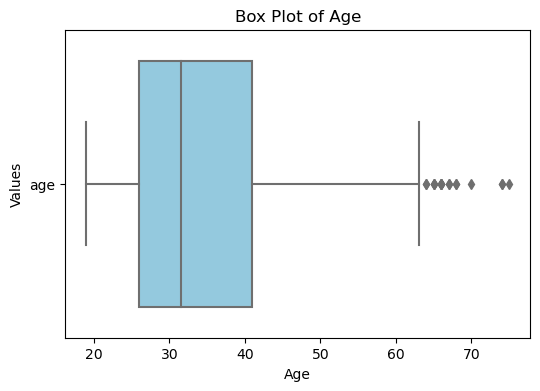

In [ ]:
# Box plot to detect outliers
data = df_credit1[['age']]

plt.figure(figsize = (6, 4))
sns.boxplot(data, orient="h", color='skyblue')
plt.xlabel('Age')
plt.ylabel('Values')
plt.title('Box Plot of Age')
plt.show()

In [ ]:
# Calculation of inner quartile range (IQR)
data = df_credit1['age']

q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 -q1

lower_limit = q1 - 2.0 * iqr
upper_limit = q3 + 2.0 * iqr
outliers = [x for x in data if x < lower_limit or x > upper_limit]

print('Q1: ', q1)
print('Q3: ', q3)
print('IQR: ', iqr)
print("Lower Limit: ", lower_limit)
print("Upper Limit: ", upper_limit)
print("Potential Outliers: ", outliers)

Q1:  26.0
Q3:  41.0
IQR:  15.0
Lower Limit:  -4.0
Upper Limit:  71.0
Potential Outliers:  [74, 75, 74]


In [ ]:
cap_outliers(df_credit1, "age", lower_limit, upper_limit)

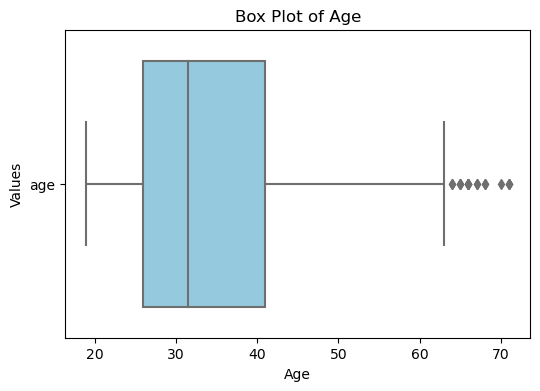

In [ ]:
# Box plot to detect outliers

data = df_credit1[['age']]

plt.figure(figsize = (6, 4))
sns.boxplot(data, orient="h", color='skyblue')
plt.xlabel('Age')
plt.ylabel('Values')
plt.title('Box Plot of Age')
plt.show()

In [ ]:
# Calculate maximum value for new feature creation
max_v = max(df_credit1['age'])
max_v

71

In [ ]:
# New categorical feature - 'age_groups' for EDA
bins = [0, 20, 40, 60,  max_v]  # Define your custom boundaries here
labels = ["< 20", "20 - 40", "40 - 60", "> 60"]

df_credit1['age_groups'] = pd.cut(df_credit1['age'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
# Comparing original and new features
result = df_credit1[['age', 'age_groups']].sample(5)
result

,age,age_groups
935,30,20 - 40
627,29,20 - 40
125,30,20 - 40
212,50,40 - 60
109,35,20 - 40


# Phase 2: Exploratory Data Analysis (EDA)

In [ ]:
#  Preview the preprocessed dataframe
df_credit1.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,...,employment_duration_encoded,purpose_encoded,other_credit_encoded,housing_encoded,job_encoded,phone_encoded,default_encoded,loan_duration,loan_amount,age_groups
1,1 - 200 DM,48.0,good,furniture/appliances,5951.0,< 100 DM,1 - 4 years,2,2,22,...,2,3,1,1,1,0,1,> 3 years,3000 - 6000,20 - 40
3,< 0 DM,42.0,good,furniture/appliances,7882.0,< 100 DM,4 - 7 years,2,4,45,...,3,3,1,0,1,0,0,> 3 years,6000 - 9000,40 - 60
4,< 0 DM,24.0,poor,car,4870.0,< 100 DM,1 - 4 years,3,4,53,...,2,1,1,0,1,0,1,1 - 2 years,3000 - 6000,40 - 60
7,1 - 200 DM,36.0,good,car,6948.0,< 100 DM,1 - 4 years,2,2,35,...,2,1,1,2,0,1,0,2 - 3 years,6000 - 9000,20 - 40
9,1 - 200 DM,30.0,critical,car,5234.0,< 100 DM,unemployed,4,2,28,...,0,1,1,1,0,0,1,2 - 3 years,3000 - 6000,20 - 40


In [ ]:
df_credit1.shape

(522, 30)

In [ ]:
# Check the data types
df_credit1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522 entries, 1 to 999
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   checking_balance             522 non-null    object  
 1   months_loan_duration         522 non-null    float64 
 2   credit_history               522 non-null    object  
 3   purpose                      522 non-null    object  
 4   amount                       522 non-null    float64 
 5   savings_balance              522 non-null    object  
 6   employment_duration          522 non-null    object  
 7   percent_of_income            522 non-null    int64   
 8   years_at_residence           522 non-null    int64   
 9   age                          522 non-null    int64   
 10  other_credit                 522 non-null    object  
 11  housing                      522 non-null    object  
 12  existing_loans_count         522 non-null    int64   
 13  job       

In [ ]:
df_credit1.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default',
       'checking_balance_encoded', 'savings_balance_encoded',
       'credit_history_encoded', 'employment_duration_encoded',
       'purpose_encoded', 'other_credit_encoded', 'housing_encoded',
       'job_encoded', 'phone_encoded', 'default_encoded', 'loan_duration',
       'loan_amount', 'age_groups'],
      dtype='object')

## 2.1 Feature Understanding

In this phase, I will try to understand the statistical values of the features and their distributions in relating to ‘loan_default’ data.

In [ ]:
# Summary statistics of numerical columns
df_credit1.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,checking_balance_encoded,savings_balance_encoded,credit_history_encoded,employment_duration_encoded,purpose_encoded,other_credit_encoded,housing_encoded,job_encoded,phone_encoded,default_encoded
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,21.265805,3243.539033,2.946360,2.825670,34.869732,1.367816,1.155172,0.632184,0.342912,1.634100,2.229885,1.971264,0.904215,1.082375,1.319923,0.365900,0.442529
std,12.240634,2787.482282,1.113948,1.134975,11.726174,0.580190,0.362416,0.660627,0.760870,1.095369,1.220753,1.154619,0.436376,0.570311,0.983133,0.482144,0.497163
min,6.000000,276.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1297.500000,2.000000,2.000000,26.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,18.000000,2326.500000,3.000000,3.000000,31.500000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,26.750000,3971.250000,4.000000,4.000000,41.000000,2.000000,1.000000,1.000000,0.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,56.250000,13329.375000,4.000000,4.000000,71.000000,4.000000,2.000000,2.000000,3.000000,4.000000,4.000000,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000


In [ ]:
# Summary statistics of categorical columns
df_credit1.describe(include = ['object', 'category'])

,checking_balance,credit_history,purpose,savings_balance,employment_duration,other_credit,housing,job,phone,default,loan_duration,loan_amount,age_groups
count,522,522,522,522,522,522,522,522,522,522,522,522,522
unique,3,5,5,4,5,3,3,4,2,2,4,5,4
top,< 0 DM,good,furniture/appliances,< 100 DM,1 - 4 years,none,own,skilled,no,no,1 - 2 years,< 3000,20 - 40
freq,245,292,245,412,174,418,349,313,331,291,200,318,378


#### 'checking_balance' column

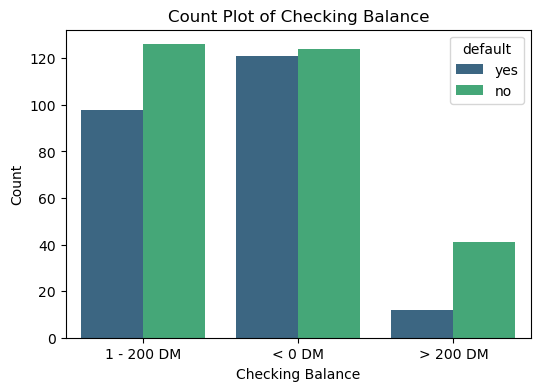

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_credit1, x='checking_balance', hue='default', palette='viridis')
plt.xlabel('Checking Balance')
plt.ylabel('Count')
plt.title('Count Plot of Checking Balance')
plt.show()

In [ ]:
# calculate value counts and percentage
def calculate_percentage(data, df):
    value_counts = data.value_counts()
    percentages = (value_counts / len(df)) * 100
    result = pd.DataFrame({'Count': value_counts, 'Percentage': percentages})
    return result

In [ ]:
data = df_credit1['checking_balance'].groupby(df_credit1['default'])
percent = calculate_percentage(data, df_credit1)
percent.T

default                   no                                yes             \
checking_balance  1 - 200 DM      < 0 DM   > 200 DM      < 0 DM 1 - 200 DM   
Count             126.000000  124.000000  41.000000  121.000000  98.000000   
Percentage         24.137931   23.754789   7.854406   23.180077  18.773946   

default                      
checking_balance   > 200 DM  
Count             12.000000  
Percentage         2.298851

#### 'months_loan_duration' column

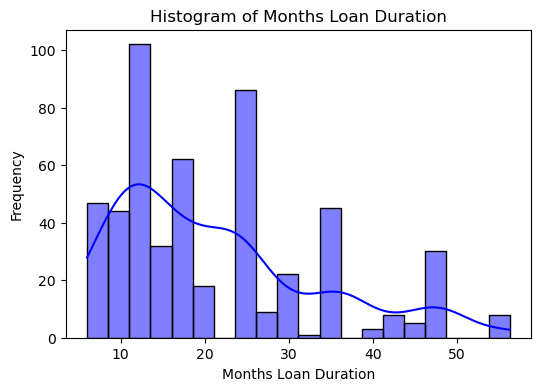

In [ ]:
data = df_credit1['months_loan_duration']

plt.figure(figsize = (6, 4))
sns.histplot(data, bins=20, kde=True, color='blue', edgecolor='black')
plt.xlabel('Months Loan Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Months Loan Duration')
plt.show()

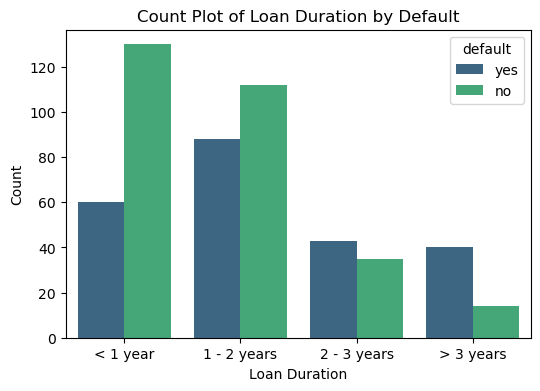

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_credit1, x='loan_duration', hue='default', palette='viridis')
plt.xlabel('Loan Duration')
plt.ylabel('Count')
plt.title('Count Plot of Loan Duration by Default')
plt.show()

In [ ]:
data = df_credit1['loan_duration'].groupby(df_credit1['default'])
percent = calculate_percentage(data, df_credit1)
percent.T

default                no                                            yes  \
loan_duration    < 1 year 1 - 2 years 2 - 3 years  > 3 years 1 - 2 years   
Count          130.000000  112.000000   35.000000  14.000000   88.000000   
Percentage      24.904215   21.455939    6.704981   2.681992   16.858238   

default                                          
loan_duration   < 1 year 2 - 3 years  > 3 years  
Count          60.000000   43.000000  40.000000  
Percentage     11.494253    8.237548   7.662835

#### 'credit_history' column

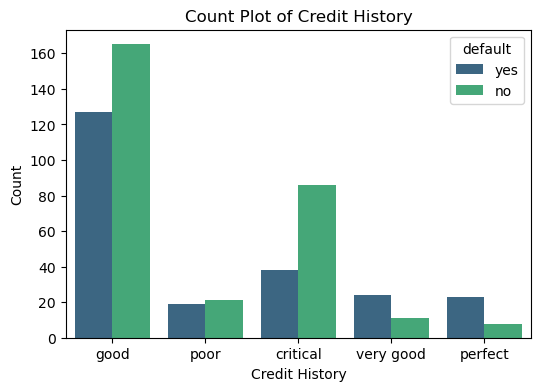

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_credit1, x='credit_history', hue='default', palette='viridis')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.title('Count Plot of Credit History')
plt.show()

In [ ]:
data = df_credit1['credit_history'].groupby(df_credit1['default'])
percent = calculate_percentage(data, df_credit1)
percent.T

default                 no                                            \
credit_history        good   critical       poor very good   perfect   
Count           165.000000  86.000000  21.000000  11.00000  8.000000   
Percentage       31.609195  16.475096   4.022989   2.10728  1.532567   

default                yes                                             
credit_history        good   critical  very good   perfect       poor  
Count           127.000000  38.000000  24.000000  23.00000  19.000000  
Percentage       24.329502   7.279693   4.597701   4.40613   3.639847

#### 'purpose' column

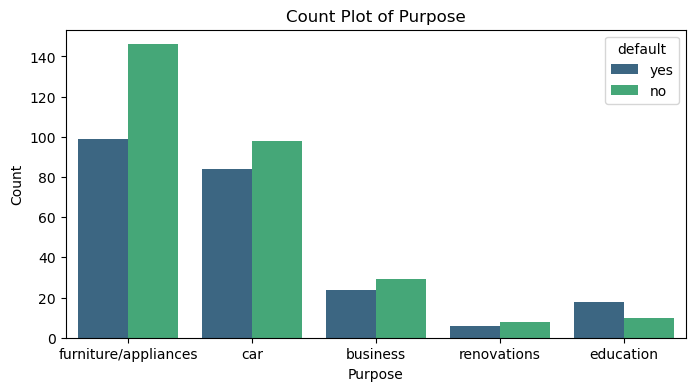

In [ ]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df_credit1, x='purpose', hue='default', palette='viridis')
plt.xlabel('Purpose')
ax.set_xticklabels(ax.get_xticklabels())
plt.ylabel('Count')
plt.title('Count Plot of Purpose')
plt.show()

In [ ]:
data = df_credit1['purpose'].groupby(df_credit1['default'])
percent = calculate_percentage(data, df_credit1)
percent.T

default                      no                                               \
purpose    furniture/appliances        car   business  education renovations   
Count                146.000000  98.000000  29.000000  10.000000    8.000000   
Percentage            27.969349  18.773946   5.555556   1.915709    1.532567   

default                     yes                                               
purpose    furniture/appliances        car   business  education renovations  
Count                 99.000000  84.000000  24.000000  18.000000    6.000000  
Percentage            18.965517  16.091954   4.597701   3.448276    1.149425

#### 'amount' column

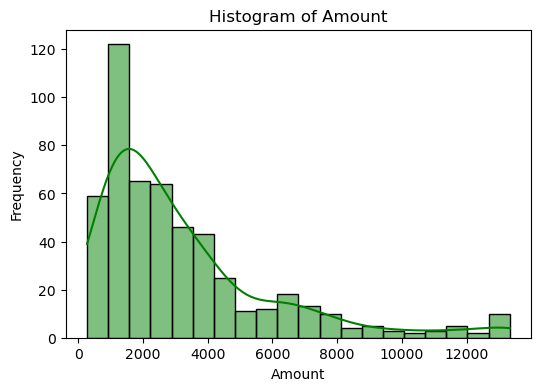

In [ ]:
data = df_credit1['amount']

plt.figure(figsize = (6, 4))
sns.histplot(data, bins=20, kde=True, color='green', edgecolor='black')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Amount')
plt.show()

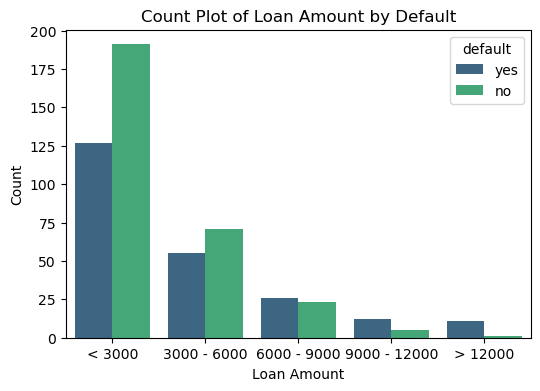

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_credit1, x='loan_amount', hue='default', palette='viridis')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Count Plot of Loan Amount by Default')
plt.show()

In [ ]:
data = df_credit1['loan_amount'].groupby(df_credit1['default'])
percent = calculate_percentage(data, df_credit1)
percent.T

default              no                                                 \
loan_amount      < 3000 3000 - 6000 6000 - 9000 9000 - 12000   > 12000   
Count        191.000000   71.000000    23.00000     5.000000  1.000000   
Percentage    36.590038   13.601533     4.40613     0.957854  0.191571   

default             yes                                                 
loan_amount      < 3000 3000 - 6000 6000 - 9000 9000 - 12000   > 12000  
Count        127.000000   55.000000   26.000000    12.000000  11.00000  
Percentage    24.329502   10.536398    4.980843     2.298851   2.10728

#### 'savings_balance' column

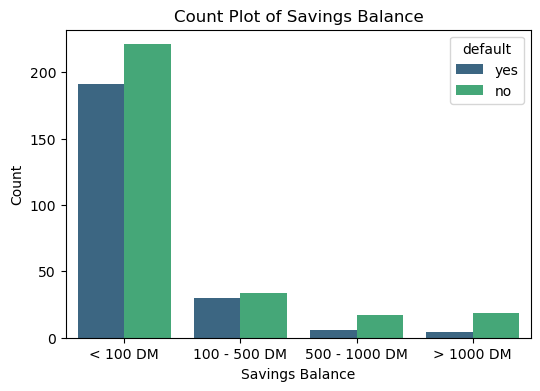

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_credit1, x='savings_balance', hue='default', palette='viridis')
plt.xlabel('Savings Balance')
plt.ylabel('Count')
plt.title('Count Plot of Savings Balance')
plt.show()

In [ ]:
data = df_credit1['savings_balance'].groupby(df_credit1['default'])
percent = calculate_percentage(data, df_credit1)
percent.T

default                  no                                               yes  \
savings_balance    < 100 DM 100 - 500 DM  > 1000 DM 500 - 1000 DM    < 100 DM   
Count            221.000000     34.00000  19.000000     17.000000  191.000000   
Percentage        42.337165      6.51341   3.639847      3.256705   36.590038   

default                                               
savings_balance 100 - 500 DM 500 - 1000 DM > 1000 DM  
Count              30.000000      6.000000  4.000000  
Percentage          5.747126      1.149425  0.766284

#### 'employment_duration' column

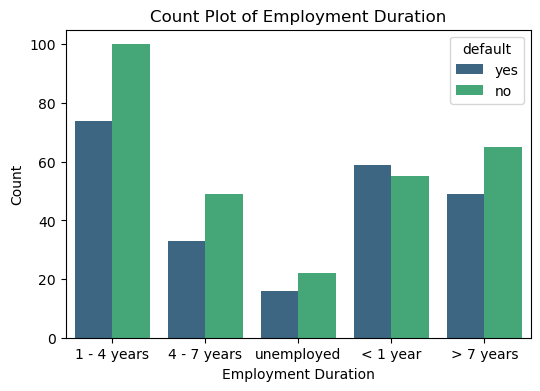

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_credit1, x='employment_duration', hue='default', palette='viridis')
plt.xlabel('Employment Duration')
plt.ylabel('Count')
plt.title('Count Plot of Employment Duration')
plt.show()

In [ ]:
data = df_credit1['employment_duration'].groupby(df_credit1['default'])
percent = calculate_percentage(data, df_credit1)
percent.T

default                      no                                               \
employment_duration 1 - 4 years  > 7 years   < 1 year 4 - 7 years unemployed   
Count                100.000000  65.000000  55.000000   49.000000  22.000000   
Percentage            19.157088  12.452107  10.536398    9.386973   4.214559   

default                     yes                                               
employment_duration 1 - 4 years   < 1 year  > 7 years 4 - 7 years unemployed  
Count                 74.000000  59.000000  49.000000   33.000000  16.000000  
Percentage            14.176245  11.302682   9.386973    6.321839   3.065134

#### 'percent_of_income' column

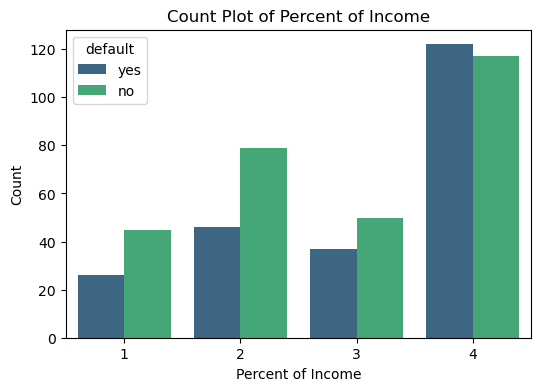

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_credit1, x='percent_of_income', hue='default', palette='viridis')
plt.xlabel('Percent of Income')
plt.ylabel('Count')
plt.title('Count Plot of Percent of Income')
plt.show()

In [ ]:
data = df_credit1['percent_of_income'].groupby(df_credit1['default'])
percent = calculate_percentage(data, df_credit1)
percent.T

default                    no                                       yes  \
percent_of_income           4        2          3         1           4   
Count              117.000000  79.0000  50.000000  45.00000  122.000000   
Percentage          22.413793  15.1341   9.578544   8.62069   23.371648   

default                                             
percent_of_income          2          3          1  
Count              46.000000  37.000000  26.000000  
Percentage          8.812261   7.088123   4.980843

#### 'years_at_residence' column

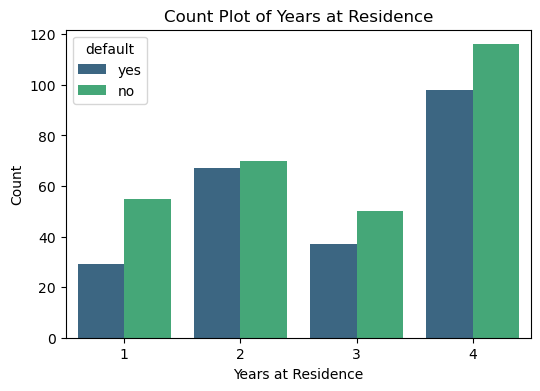

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_credit1, x='years_at_residence', hue='default', palette='viridis')
plt.xlabel('Years at Residence')
plt.ylabel('Count')
plt.title('Count Plot of Years at Residence')
plt.show()

In [ ]:
data = df_credit1['years_at_residence'].groupby(df_credit1['default'])
percent = calculate_percentage(data, df_credit1)
percent.T

default                     no                                         yes  \
years_at_residence           4          2          1          3          4   
Count               116.000000  70.000000  55.000000  50.000000  98.000000   
Percentage           22.222222  13.409962  10.536398   9.578544  18.773946   

default                                              
years_at_residence          2          3          1  
Count               67.000000  37.000000  29.000000  
Percentage          12.835249   7.088123   5.555556

#### 'age' column

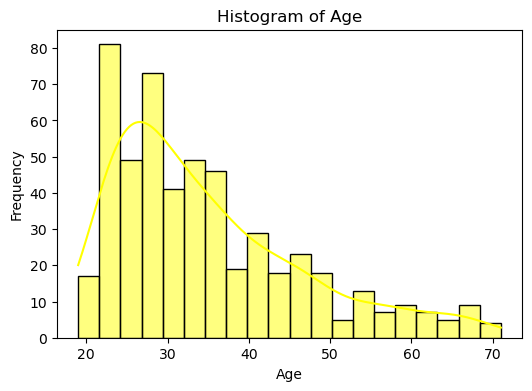

In [ ]:
data = df_credit1['age']

plt.figure(figsize = (6, 4))
sns.histplot(data, bins=20, kde=True, color='yellow', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

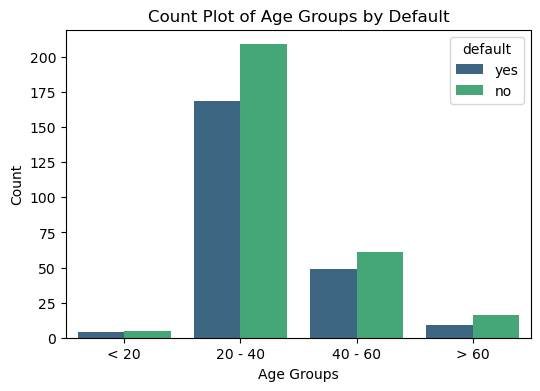

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_credit1, x='age_groups', hue='default', palette='viridis')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title('Count Plot of Age Groups by Default')
plt.show()

In [ ]:
data = df_credit1['age_groups'].groupby(df_credit1['default'])
percent = calculate_percentage(data, df_credit1)
percent.T

default             no                                         yes             \
age_groups     20 - 40    40 - 60       > 60      < 20     20 - 40    40 - 60   
Count       209.000000  61.000000  16.000000  5.000000  169.000000  49.000000   
Percentage   40.038314  11.685824   3.065134  0.957854   32.375479   9.386973   

default                         
age_groups      > 60      < 20  
Count       9.000000  4.000000  
Percentage  1.724138  0.766284

#### 'other_credit' column

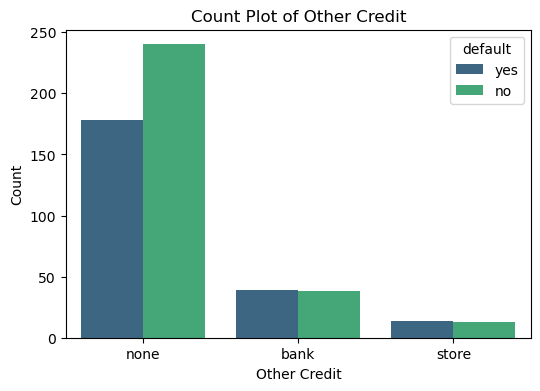

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_credit1, x='other_credit', hue='default', palette='viridis')
plt.xlabel('Other Credit')
plt.ylabel('Count')
plt.title('Count Plot of Other Credit')
plt.show()

In [ ]:
data = df_credit1['other_credit'].groupby(df_credit1['default'])
percent = calculate_percentage(data, df_credit1)
percent.T

default               no                               yes             \
other_credit        none       bank      store        none       bank   
Count         240.000000  38.000000  13.000000  178.000000  39.000000   
Percentage     45.977011   7.279693   2.490421   34.099617   7.471264   

default                  
other_credit      store  
Count         14.000000  
Percentage     2.681992

#### 'housing' column

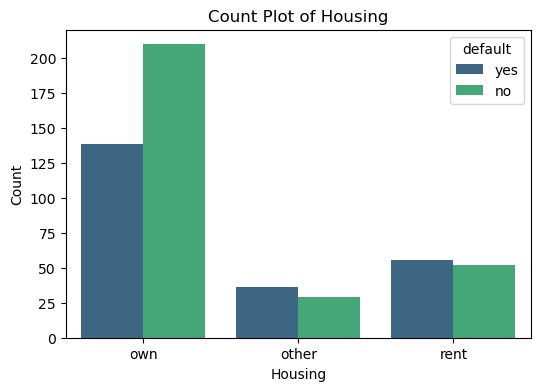

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_credit1, x='housing', hue='default', palette='viridis')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.title('Count Plot of Housing')
plt.show()

In [ ]:
data = df_credit1['housing'].groupby(df_credit1['default'])
percent = calculate_percentage(data, df_credit1)
percent.T

default             no                               yes                      
housing            own       rent      other         own       rent      other
Count       210.000000  52.000000  29.000000  139.000000  56.000000  36.000000
Percentage   40.229885   9.961686   5.555556   26.628352  10.727969   6.896552

#### 'existing_loans_count' column

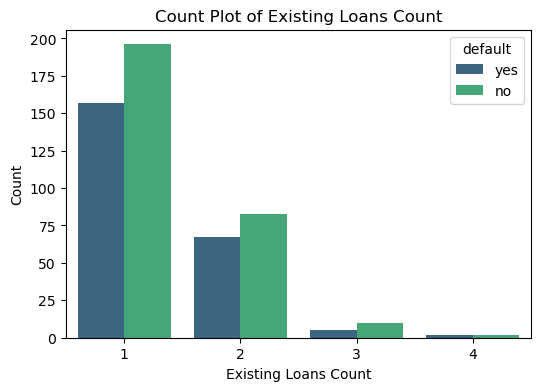

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_credit1, x='existing_loans_count', hue='default', palette='viridis')
plt.xlabel('Existing Loans Count')
plt.ylabel('Count')
plt.title('Count Plot of Existing Loans Count')
plt.show()

In [ ]:
data = df_credit1['existing_loans_count'].groupby(df_credit1['default'])
percent = calculate_percentage(data, df_credit1)
percent.T

default                       no                                         yes  \
existing_loans_count           1          2          3         4           1   
Count                 196.000000  83.000000  10.000000  2.000000  157.000000   
Percentage             37.547893  15.900383   1.915709  0.383142   30.076628   

default                                              
existing_loans_count          2         3         4  
Count                 67.000000  5.000000  2.000000  
Percentage            12.835249  0.957854  0.383142

#### 'job' column

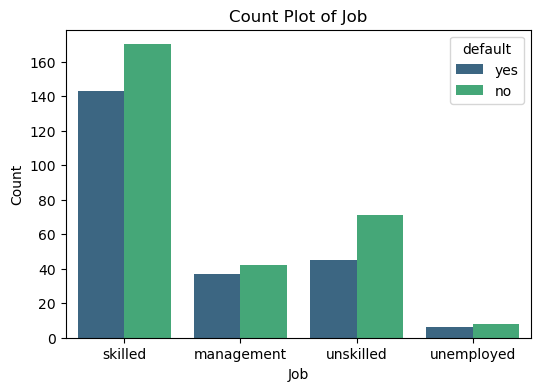

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_credit1, x='job', hue='default', palette='viridis')
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Count Plot of Job')
plt.show()

In [ ]:
data = df_credit1['job'].groupby(df_credit1['default'])
percent = calculate_percentage(data, df_credit1)
percent.T

default            no                                          yes            \
job           skilled  unskilled management unemployed     skilled unskilled   
Count       170.00000  71.000000  42.000000   8.000000  143.000000  45.00000   
Percentage   32.56705  13.601533   8.045977   1.532567   27.394636   8.62069   

default                           
job        management unemployed  
Count       37.000000   6.000000  
Percentage   7.088123   1.149425

#### 'dependents' column

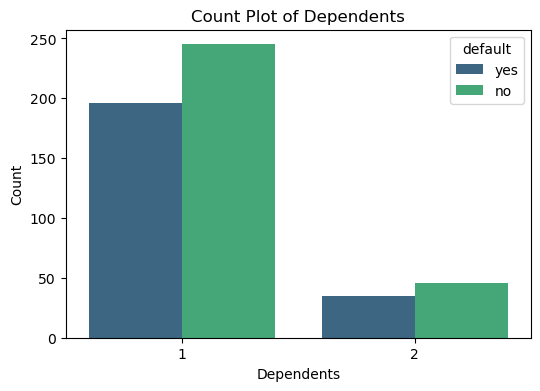

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_credit1, x='dependents',  hue='default', palette='viridis')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Count Plot of Dependents')
plt.show()

In [ ]:
data = df_credit1['dependents'].groupby(df_credit1['default'])
percent = calculate_percentage(data, df_credit1)
percent.T

default             no                    yes           
dependents           1          2           1          2
Count       245.000000  46.000000  196.000000  35.000000
Percentage   46.934866   8.812261   37.547893   6.704981

#### 'phone' column

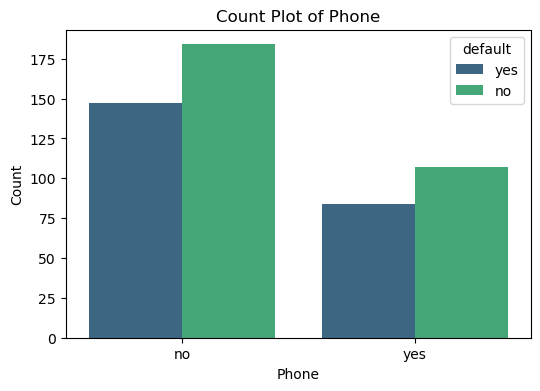

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_credit1, x='phone', hue='default', palette='viridis')
plt.xlabel('Phone')
plt.ylabel('Count')
plt.title('Count Plot of Phone')
plt.show()

In [ ]:
data = df_credit1['phone'].groupby(df_credit1['default'])
percent = calculate_percentage(data, df_credit1)
percent.T

default             no                    yes           
phone               no         yes         no        yes
Count       184.000000  107.000000  147.00000  84.000000
Percentage   35.249042   20.498084   28.16092  16.091954

#### 'default' column

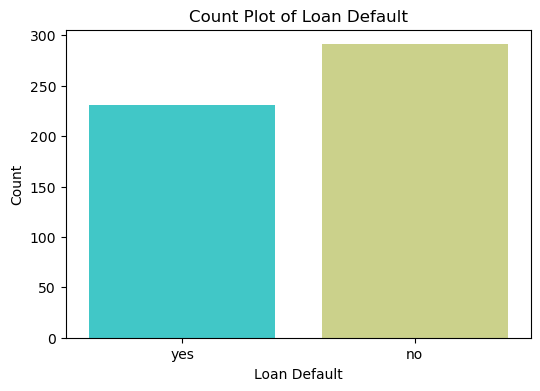

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_credit1, x='default', palette='rainbow')
plt.xlabel('Loan Default')
plt.ylabel('Count')
plt.title('Count Plot of Loan Default')
plt.show()

In [ ]:
data = df_credit1['default'].groupby(df_credit1['default'])
percent = calculate_percentage(data, df_credit1)
percent.T

default,no,yes
default,no,yes
Count,291.000000,231.000000
Percentage,55.747126,44.252874


## Phase 2.2: Feature Relationships

 Correlation analysis and hypothesis testing will be performed in this phase to find the relationships between features.

In [ ]:
# Separating numerical columns for analysis
num_cols = df_credit1.select_dtypes(include=['int32', 'int64', 'float64'])

In [ ]:
num_cols.columns

Index(['months_loan_duration', 'amount', 'percent_of_income',
       'years_at_residence', 'age', 'existing_loans_count', 'dependents',
       'checking_balance_encoded', 'savings_balance_encoded',
       'credit_history_encoded', 'employment_duration_encoded',
       'purpose_encoded', 'other_credit_encoded', 'housing_encoded',
       'job_encoded', 'phone_encoded', 'default_encoded'],
      dtype='object')

In [ ]:
# Dropping the encoded columns
encoded_columns =['checking_balance_encoded', 'savings_balance_encoded', 'credit_history_encoded', 'employment_duration_encoded',
                   'purpose_encoded', 'other_credit_encoded', 'housing_encoded', 'job_encoded', 'phone_encoded']
num_cols.drop(columns = encoded_columns , inplace=True)
num_cols.columns

Index(['months_loan_duration', 'amount', 'percent_of_income',
       'years_at_residence', 'age', 'existing_loans_count', 'dependents',
       'default_encoded'],
      dtype='object')

In [ ]:
# Separating categorical columns for analysis
cat_cols = df_credit1.select_dtypes(include=['category', 'object'])
cat_cols.columns

Index(['checking_balance', 'credit_history', 'purpose', 'savings_balance',
       'employment_duration', 'other_credit', 'housing', 'job', 'phone',
       'default', 'loan_duration', 'loan_amount', 'age_groups'],
      dtype='object')

### 2.2.1 Correlation Analysis

In [ ]:
# Checking correlation between numerical columns
df_corr = num_cols.corr()
df_corr

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default_encoded
months_loan_duration,1.000000,0.623466,0.039441,0.047172,0.002699,-0.003117,-0.017103,0.292485
amount,0.623466,1.000000,-0.271691,0.023756,0.078086,0.029925,0.007889,0.182024
percent_of_income,0.039441,-0.271691,1.000000,0.056351,0.029146,-0.043659,-0.098202,0.126122
years_at_residence,0.047172,0.023756,0.056351,1.000000,0.242451,0.176260,0.093888,0.045139
age,0.002699,0.078086,0.029146,0.242451,1.000000,0.191281,0.127613,-0.055940
existing_loans_count,-0.003117,0.029925,-0.043659,0.176260,0.191281,1.000000,0.120555,-0.013079
dependents,-0.017103,0.007889,-0.098202,0.093888,0.127613,0.120555,1.000000,-0.009000
default_encoded,0.292485,0.182024,0.126122,0.045139,-0.055940,-0.013079,-0.009000,1.000000


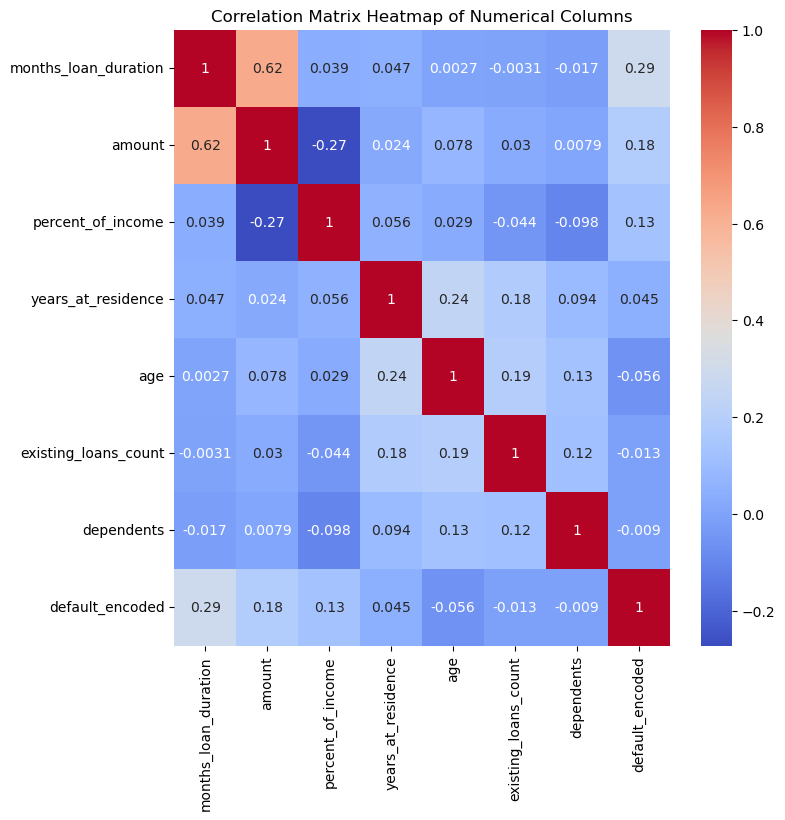

In [ ]:
# Creatiing a Heatmap
correlation_matrix = df_corr
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap of Numerical Columns")
plt.show()

<Figure size 800x800 with 0 Axes>

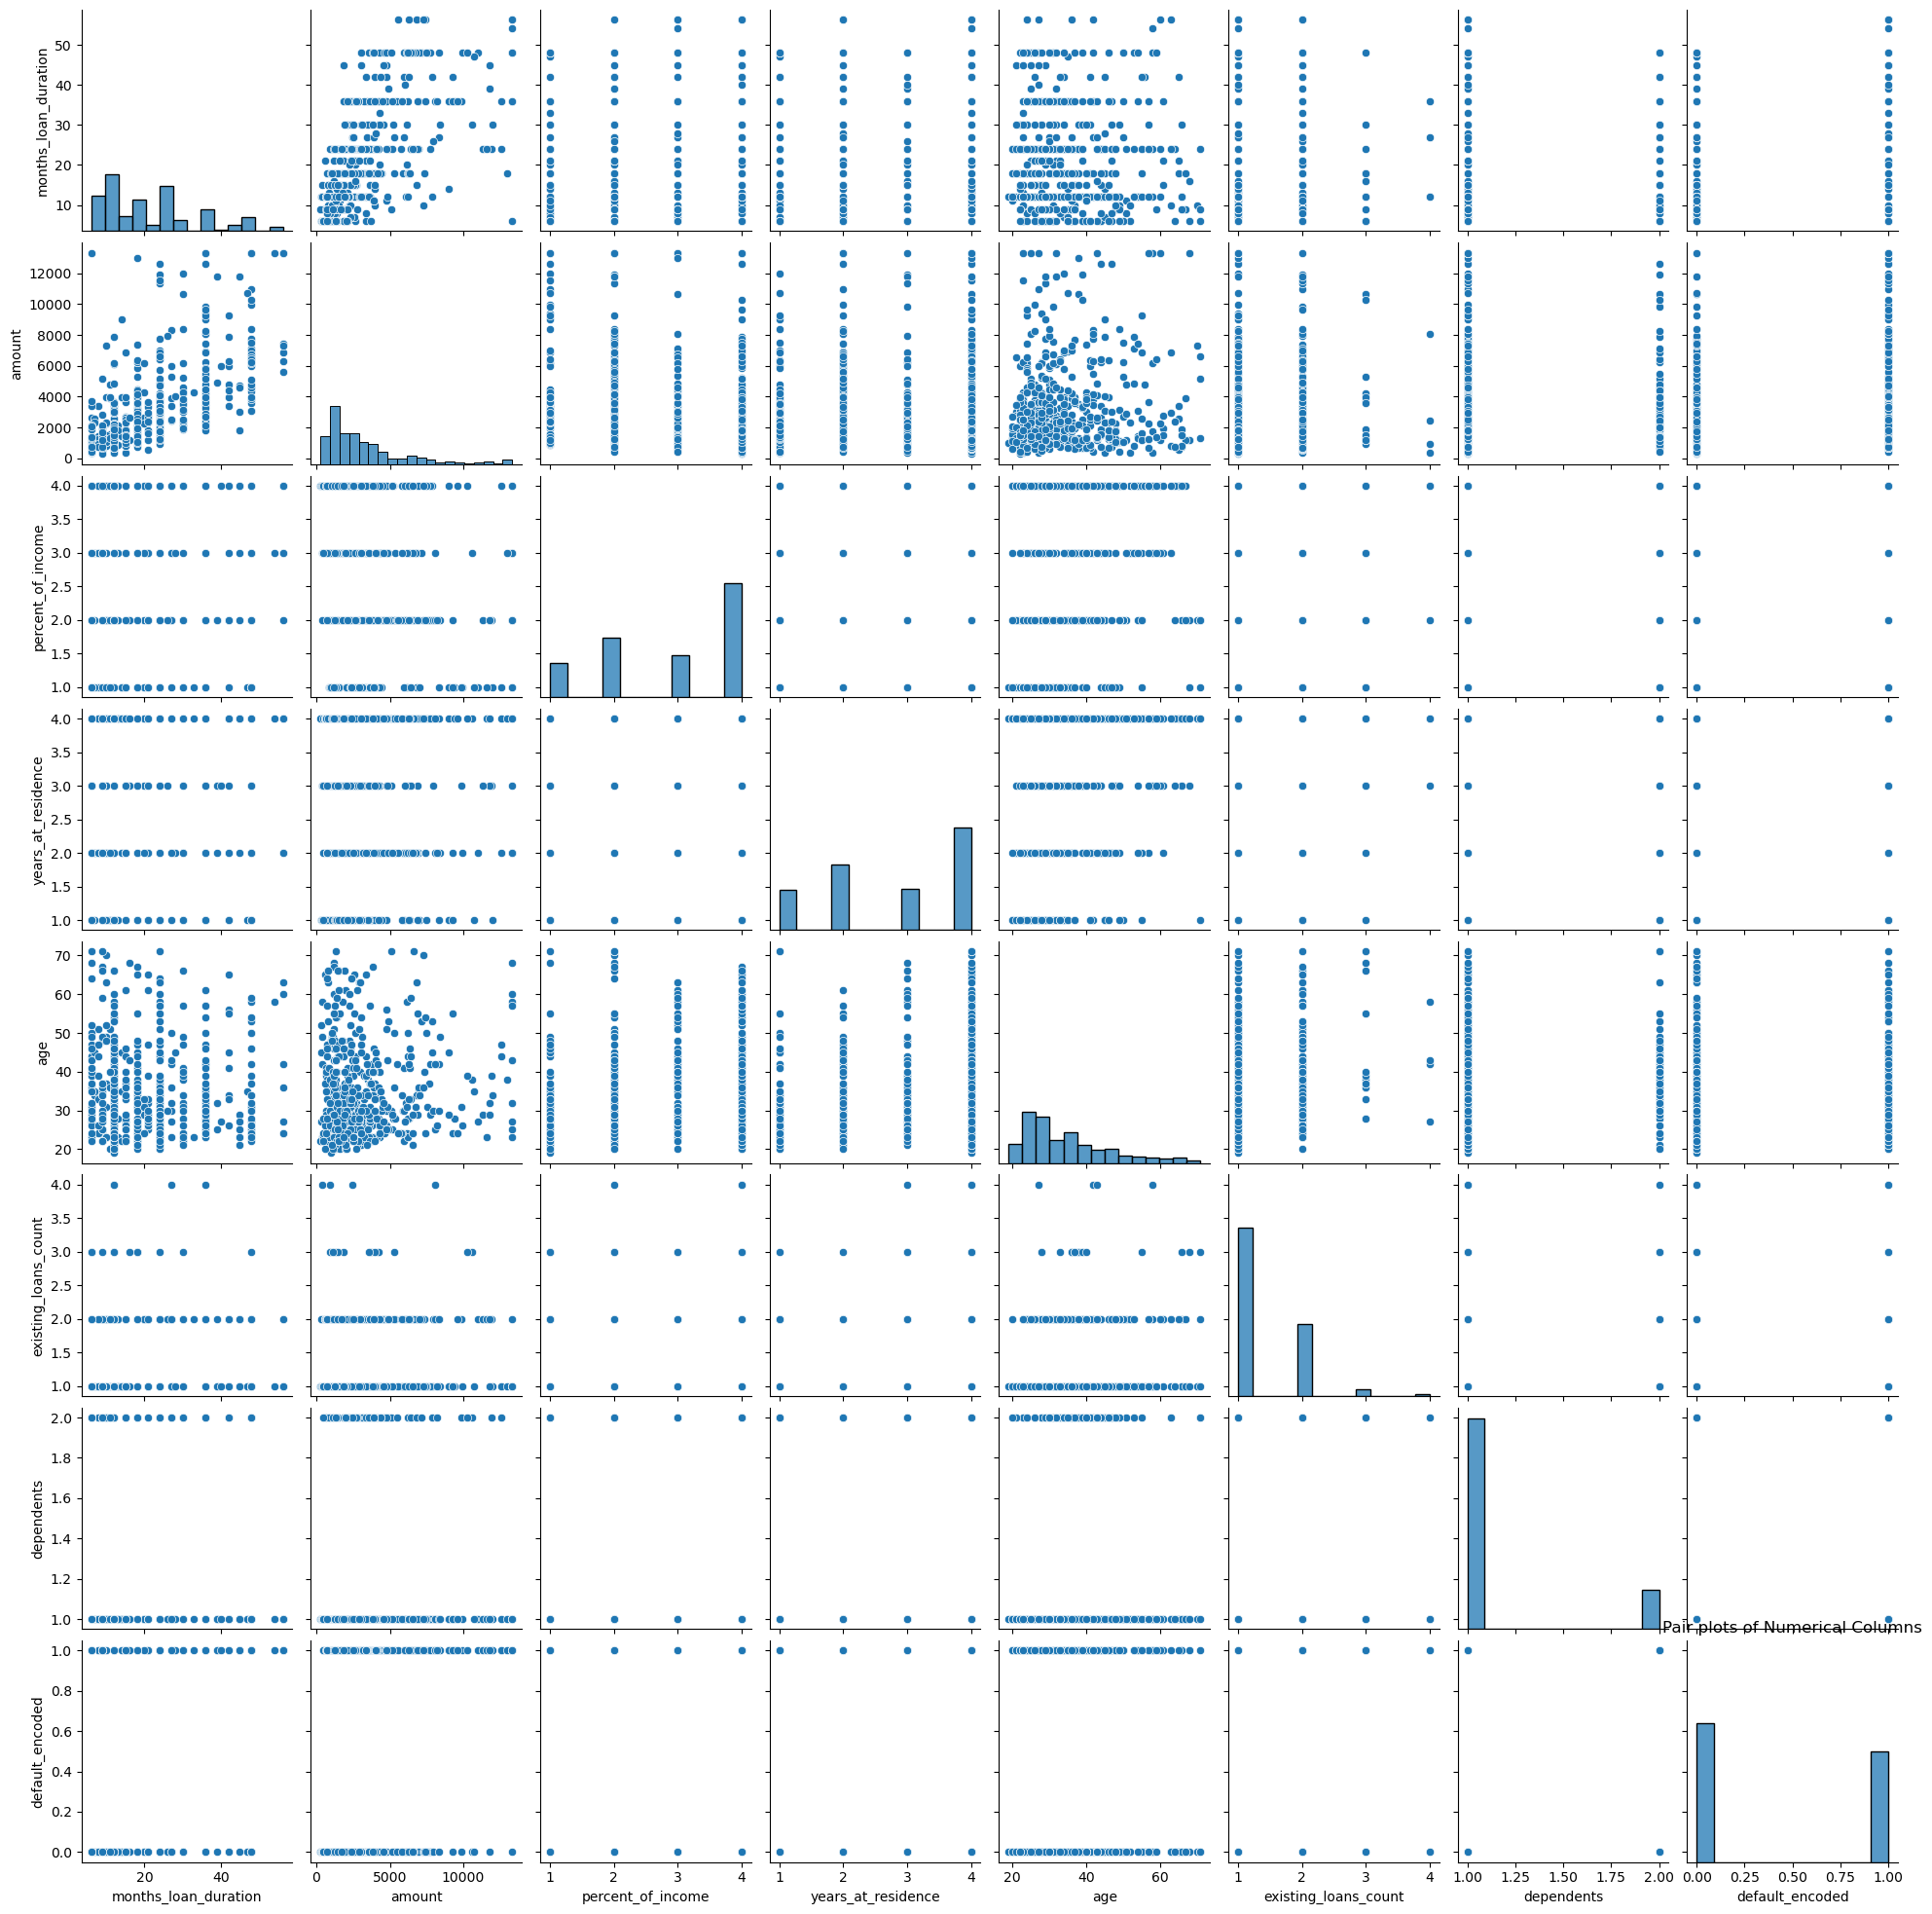

In [ ]:
# Creating a Pair Plot
plt.figure(figsize=(8,8))
sns.pairplot(num_cols)
plt.title("Pair plots of Numerical Columns")
plt.show()

#### Correlation analysis between Loan Duration and Amount

In [ ]:
pearson_corr, p_value = scipy.stats.pearsonr(df_credit1['months_loan_duration'], df_credit1['amount'])
print(f"Pearson Correlation Coefficient (r): {pearson_corr}")
print(f"P-Value: {p_value}")

alpha = 0.05  # Significance level
if p_value < alpha:
    print("Null Hypothesis (H0) is rejected.")
    print("Ha: There is a statistically significant linear relationship between the two features")
else:
    print("Null Hypothesis (H0) is not rejected.")
    print("H0: There is no statistically significant linear relationship between the two features.")

Pearson Correlation Coefficient (r): 0.623465864045948
P-Value: 1.485841111495964e-57
Null Hypothesis (H0) is rejected.
Ha: There is a statistically significant linear relationship between the two features


In [ ]:
spearman_corr, p_value = scipy.stats.spearmanr(df_credit1['months_loan_duration'], df_credit1['amount'])
print(f"Spearman Correlation Coefficient: {spearman_corr}")
print(f"P-Value: {p_value}")

alpha = 0.05  # Significance level
if p_value < alpha:
    print("Null Hypothesis (H0) is rejected.")
    print("Ha: There is a statistically significant monotonic relationship between the two features.")
else:
    print("Null Hypothesis (H0) is not rejected.")
    print("H0: There is no statistically significant monotonic relationship between the two features.")

Spearman Correlation Coefficient: 0.660451020159355
P-Value: 1.038077969512233e-66
Null Hypothesis (H0) is rejected.
Ha: There is a statistically significant monotonic relationship between the two features.


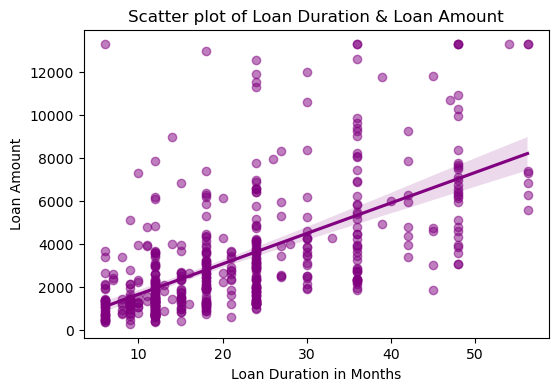

In [ ]:
plt.figure(figsize=(6, 4))
sns.regplot(x='months_loan_duration', y='amount', data=df_credit1, color='purple', marker='o', scatter_kws={'alpha': 0.5})
plt.xlabel('Loan Duration in Months')
plt.ylabel('Loan Amount')
plt.title('Scatter plot of Loan Duration & Loan Amount')
plt.show()

#### Correlation analysis between Loan Amount and Age

In [ ]:
pearson_corr, p_value = scipy.stats.pearsonr(df_credit1['amount'], df_credit1['age'])
print(f"Pearson Correlation Coefficient (r): {pearson_corr}")
print(f"P-Value: {p_value}")

alpha = 0.05  # Significance level
if p_value < alpha:
    print("Null Hypothesis (H0) is rejected.")
    print("Ha: There is a statistically significant linear relationship between the two features")
else:
    print("Null Hypothesis (H0) is not rejected.")
    print("H0: There is no statistically significant linear relationship between the two features.")

Pearson Correlation Coefficient (r): 0.07808613508071188
P-Value: 0.07466700770802787
Null Hypothesis (H0) is not rejected.
H0: There is no statistically significant linear relationship between the two features.


In [ ]:
spearman_corr, p_value = scipy.stats.spearmanr(df_credit1['amount'], df_credit1['age'])
print(f"Spearman Correlation Coefficient: {spearman_corr}")
print(f"P-Value: {p_value}")

alpha = 0.05  # Significance level
if p_value < alpha:
    print("Null Hypothesis (H0) is rejected.")
    print("Ha: There is a statistically significant monotonic relationship between the two features.")
else:
    print("Null Hypothesis (H0) is not rejected.")
    print("H0: There is no statistically significant monotonic relationship between the two features.")

Spearman Correlation Coefficient: 0.062106522571287286
P-Value: 0.15650222241023568
Null Hypothesis (H0) is not rejected.
H0: There is no statistically significant monotonic relationship between the two features.


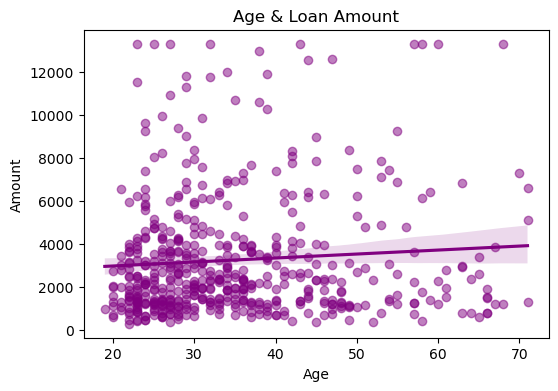

In [ ]:
plt.figure(figsize=(6, 4))
sns.regplot(x='age', y='amount', data=df_credit1, color='purple', marker='o', scatter_kws={'alpha': 0.5})
plt.xlabel('Age')
plt.ylabel('Amount')
plt.title('Age & Loan Amount')
plt.show()

#### Correlation Analysis between Loan Duration and Age

In [ ]:
pearson_corr, p_value = scipy.stats.pearsonr(df_credit1['months_loan_duration'], df_credit1['age'])
print(f"Pearson Correlation Coefficient (r): {pearson_corr}")
print(f"P-Value: {p_value}")

alpha = 0.05  # Significance level
if p_value < alpha:
    print("Null Hypothesis (H0) is rejected.")
    print("Ha: There is a statistically significant linear relationship between the two features")
else:
    print("Null Hypothesis (H0) is not rejected.")
    print("H0: There is no statistically significant linear relationship between the two features.")

Pearson Correlation Coefficient (r): 0.0026988352756773942
P-Value: 0.9509503076203933
Null Hypothesis (H0) is not rejected.
H0: There is no statistically significant linear relationship between the two features.


In [ ]:
spearman_corr, p_value = scipy.stats.spearmanr(df_credit1['amount'], df_credit1['age'])
print(f"Spearman Correlation Coefficient: {spearman_corr}")
print(f"P-Value: {p_value}")

alpha = 0.05  # Significance level
if p_value < alpha:
    print("Null Hypothesis (H0) is rejected.")
    print("Ha: There is a statistically significant monotonic relationship between the two features.")
else:
    print("Null Hypothesis (H0) is not rejected.")
    print("H0: There is no statistically significant monotonic relationship between the two features.")

Spearman Correlation Coefficient: 0.062106522571287286
P-Value: 0.15650222241023568
Null Hypothesis (H0) is not rejected.
H0: There is no statistically significant monotonic relationship between the two features.


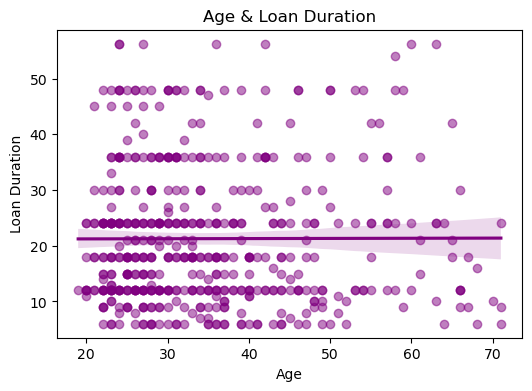

In [ ]:
plt.figure(figsize=(6, 4))
sns.regplot(x='age', y='months_loan_duration', data=df_credit1, color='purple', marker='o', scatter_kws={'alpha': 0.5})
plt.xlabel('Age')
plt.ylabel('Loan Duration')
plt.title('Age & Loan Duration')
plt.show()

### 2.2.2 Chi-squared testing

#### Chi-squared testing between Loan Default and Duration

In [ ]:
# a contingency table (cross-tabulation) of the two categorical variables
contingency_table = pd.crosstab(df_credit1['default'], df_credit1['loan_duration'])

# perform the chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Sset the significance level (alpha)
alpha = 0.05

# print the results
print("Chi-Square Statistic:", chi2)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

# initerpret the results
if p_value < alpha:
    print("Null Hypothesis (H0) is rejected.")
    print("Ha: There is a statistically significant association between the two categories.")
else:
    print("Null Hypothesis (H0) is not rejected.")
    print("H0: There is no statistically significant association or independence between the two categories.")

Chi-Square Statistic: 35.58205576662441
P-Value: 9.177797306394447e-08
Degrees of Freedom: 3
Expected Frequencies Table:
[[105.91954023 111.49425287  43.48275862  30.10344828]
 [ 84.08045977  88.50574713  34.51724138  23.89655172]]
Null Hypothesis (H0) is rejected.
Ha: There is a statistically significant association between the two categories.


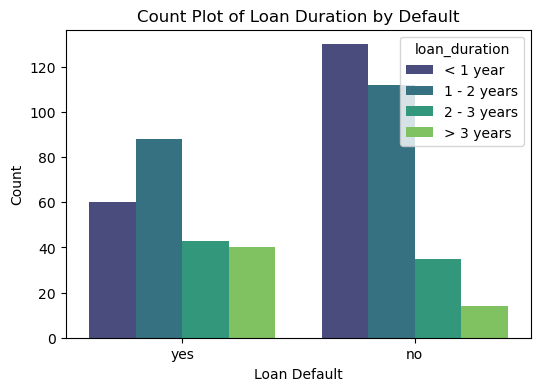

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_credit1, x='default', hue='loan_duration', palette='viridis')
plt.xlabel('Loan Default')
plt.ylabel('Count')
plt.title('Count Plot of Loan Duration by Default')
plt.show()

#### Chi-squared testing between Loan Default and Amount

In [ ]:
# a contingency table (cross-tabulation) of the two categorical variables
contingency_table = pd.crosstab(df_credit1['default'], df_credit1['loan_amount'])

# perform the chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Sset the significance level (alpha)
alpha = 0.05

# print the results
print("Chi-Square Statistic:", chi2)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

# initerpret the results
if p_value < alpha:
    print("Null Hypothesis (H0) is rejected.")
    print("Ha: There is a statistically significant association between the two categories.")
else:
    print("Null Hypothesis (H0) is not rejected.")
    print("H0: There is no statistically significant association or independence between the two categories.")

Chi-Square Statistic: 19.67499905177843
P-Value: 0.0005788383963634413
Degrees of Freedom: 4
Expected Frequencies Table:
[[177.27586207  70.24137931  27.31609195   9.47701149   6.68965517]
 [140.72413793  55.75862069  21.68390805   7.52298851   5.31034483]]
Null Hypothesis (H0) is rejected.
Ha: There is a statistically significant association between the two categories.


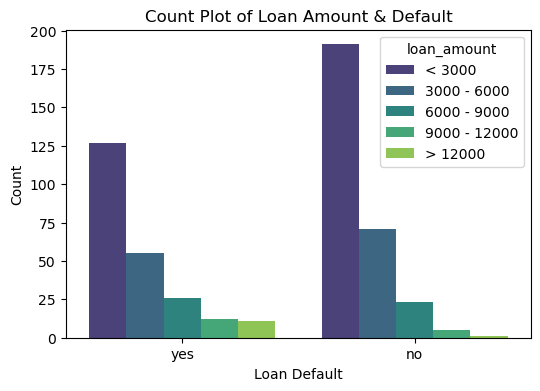

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_credit1, x='default', hue='loan_amount', palette='viridis')
plt.xlabel('Loan Default')
plt.ylabel('Count')
plt.title('Count Plot of Loan Amount & Default')
plt.show()

#### Chi-squared testing between Loan Default and All the Other Features

In [ ]:
# Create an empty dictionary to store chi-square test results
chi_square_results = {}

# Perform chi-square tests for all ccategorical features vs loan default

for feature1 in cat_cols:
    if feature1 != 'default':
            # Create a contingency table for the pair of features
            contingency_table = pd.crosstab(df_credit1[feature1], df_credit1['default'])

            # Perform the chi-square test of independence
            chi2, p, dof, expected = chi2_contingency(contingency_table)

            # Store the results in the dictionary
            chi_square_results[f'{feature1} vs default'] = {
                'Chi-Square Statistic': chi2,
                'P-Value': p,
                'Degrees of Freedom': dof,
                'Expected Frequencies Table': expected
            }

# Set the significance level (alpha)
alpha = 0.05

# Analyse and print the results for each pair
for pair, results in chi_square_results.items():
    chi2_statistic = results['Chi-Square Statistic']
    p_value = results['P-Value']

    print(f"Relationship: {pair}")
    print("Chi-Square Statistic:", chi2_statistic)
    print("P-Value:", p_value)

    # Interpret the results
    if p_value < alpha:
        print("There is a significant association between the two features.")
    else:
        print("There is no significant association between the two features.")
    print("\n")

Relationship: checking_balance vs default
Chi-Square Statistic: 12.675574461464208
P-Value: 0.0017682105531096474
There is a significant association between the two features.


Relationship: credit_history vs default
Chi-Square Statistic: 29.201741995610767
P-Value: 7.113300248179596e-06
There is a significant association between the two features.


Relationship: purpose vs default
Chi-Square Statistic: 6.323367539890966
P-Value: 0.1762654775653529
There is no significant association between the two features.


Relationship: savings_balance vs default
Chi-Square Statistic: 10.723063362899001
P-Value: 0.013321624149422574
There is a significant association between the two features.


Relationship: employment_duration vs default
Chi-Square Statistic: 3.489898082807308
P-Value: 0.4794160247956306
There is no significant association between the two features.


Relationship: other_credit vs default
Chi-Square Statistic: 2.3811031979954755
P-Value: 0.304053502195248
There is no significant a

### 2.2.3 Independent T Testing

#### T testing between Loan Default and Duration

In [ ]:
loan_default_yes = df_credit1[df_credit1['default'] == 'yes']['months_loan_duration']
loan_default_no = df_credit1[df_credit1['default'] == 'no']['months_loan_duration']

# Perform the independent samples t-test
t_statistic, p_value = ttest_ind(loan_default_yes, loan_default_no)

# Set the significance level (alpha)
alpha = 0.05

# Print the t-statistic and p-value
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Determine the conclusion based on the p-value
if p_value < alpha:
    print("Null Hypothesis (H0) is rejected.")
    print("Ha: There is a significant difference in mean loan duration between people who default loan and not.")
else:
    print("Null Hypothesis (H0) is not rejected.")
    print("H0: There is no significant difference in mean loan duration between people who default loan and not.")

T-statistic: 6.974680544336473
P-value: 9.355459376520134e-12
Null Hypothesis (H0) is rejected.
Ha: There is a significant difference in mean loan duration between people who default loan and not.


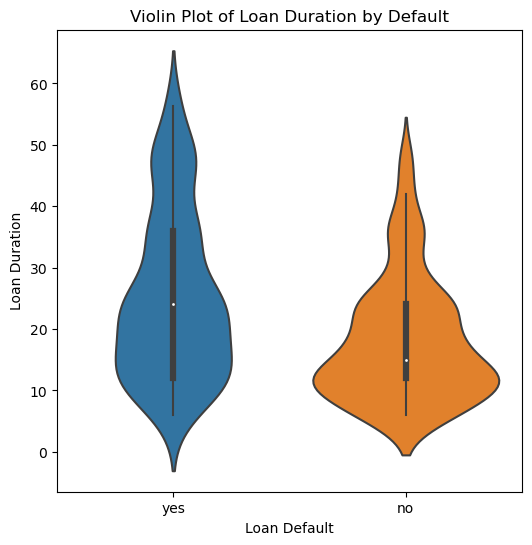

In [ ]:
plt.figure(figsize=(6, 6))
sns.violinplot(x='default', y='months_loan_duration', data=df_credit1)
plt.xlabel("Loan Default")
plt.ylabel("Loan Duration")
plt.title("Violin Plot of Loan Duration by Default")
plt.show()

#### T testing between Loan Default and Amount

In [ ]:
loan_default_yes = df_credit1[df_credit1['default'] == 'yes']['amount']
loan_default_no = df_credit1[df_credit1['default'] == 'no']['amount']

# Perform the independent samples t-test
t_statistic, p_value = ttest_ind(loan_default_yes, loan_default_no)

# Set the significance level (alpha)
alpha = 0.05

# Print the t-statistic and p-value
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Determine the conclusion based on the p-value
if p_value < alpha:
    print("Null Hypothesis (H0) is rejected.")
    print("Ha: There is a significant difference in mean loan duration between people who default loan and not.")
else:
    print("Null Hypothesis (H0) is not rejected.")
    print("H0: There is no significant difference in mean loan duration between people who default loan and not.")

T-statistic: 4.221300725579962
P-value: 2.8669310931509204e-05
Null Hypothesis (H0) is rejected.
Ha: There is a significant difference in mean loan duration between people who default loan and not.


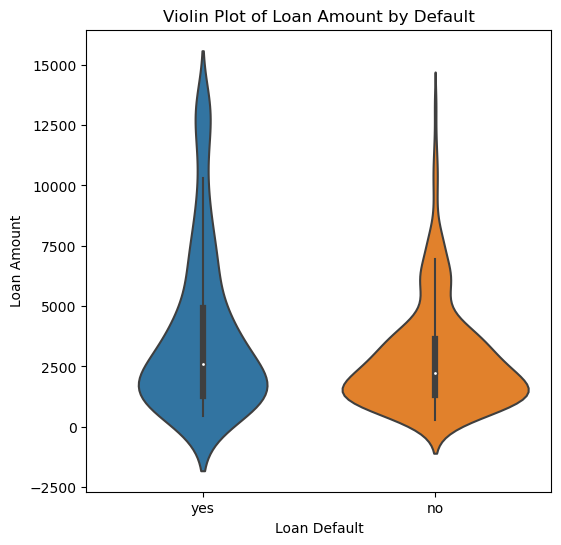

In [ ]:
plt.figure(figsize=(6, 6))
sns.violinplot(x='default', y='amount', data=df_credit1)
plt.xlabel("Loan Default")
plt.ylabel("Loan Amount")
plt.title("Violin Plot of Loan Amount by Default")
plt.show()

#### T testing between Loan Default and All the Other Numerical Features

In [ ]:
# Create an empty dictionary to store t-test results
t_test_results = {}

# Perform t-tests for all categorical features vs loan default
for feature1 in num_cols:
    if feature1 != 'default':
        loan_default_yes = df_credit1[df_credit1['default'] == 'yes'][feature1]
        loan_default_no = df_credit1[df_credit1['default'] == 'no'][feature1]

        t_statistic, p_value = ttest_ind(loan_default_yes, loan_default_no)

        # Store the results in the dictionary
        t_test_results[f'{feature1} vs default'] = {
            'T Statistic': t_statistic,
            'P-Value': p_value,
        }

# Set the significance level (alpha)
alpha = 0.05

# Analyze and print the results for each pair
for pair, results in t_test_results.items():
    t_statistic = results['T Statistic']
    p_value = results['P-Value']

    print(f"Relationship: {pair}")
    print("T Test Statistic:", t_statistic)
    print("P-Value:", p_value)

    # Interpret the results
    if p_value < alpha:
        print("There is a significant difference in mean between people who default on loans and those who do not.")
    else:
        print("There is no significant difference in mean between people who default on loans and those who do not.")

    print("\n")

Relationship: months_loan_duration vs default
T Test Statistic: 6.974680544336473
P-Value: 9.355459376520134e-12
There is a significant difference in mean between people who default on loans and those who do not.


Relationship: amount vs default
T Test Statistic: 4.221300725579962
P-Value: 2.8669310931509204e-05
There is a significant difference in mean between people who default on loans and those who do not.


Relationship: percent_of_income vs default
T Test Statistic: 2.8991744616669317
P-Value: 0.003899560015862939
There is a significant difference in mean between people who default on loans and those who do not.


Relationship: years_at_residence vs default
T Test Statistic: 1.0303784018535533
P-Value: 0.30331141390916694
There is no significant difference in mean between people who default on loans and those who do not.


Relationship: age vs default
T Test Statistic: -1.2776260988071602
P-Value: 0.20195138342042906
There is no significant difference in mean between people who 

C:\Users\KaungHtetHein\anaconda3\envs\my_python_env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


# Phase 3: Mathematical Foundation Applications

### Pre-processing data before model building

In [ ]:
# Create a new preprocessed dataframe after performing EDA to build the ML model
df_processed = df_credit1.copy(deep=True)

In [ ]:
# Dropping categorical columns since only encoded data will be utilized for model training
df_processed.drop(columns=cat_cols, inplace=True)
df_processed.columns

Index(['months_loan_duration', 'amount', 'percent_of_income',
       'years_at_residence', 'age', 'existing_loans_count', 'dependents',
       'checking_balance_encoded', 'savings_balance_encoded',
       'credit_history_encoded', 'employment_duration_encoded',
       'purpose_encoded', 'other_credit_encoded', 'housing_encoded',
       'job_encoded', 'phone_encoded', 'default_encoded'],
      dtype='object')

In [ ]:
unwanted_cols = ['years_at_residence', 'age', 'existing_loans_count', 'dependents', 'employment_duration_encoded',
                'purpose_encoded', 'other_credit_encoded', 'job_encoded', 'phone_encoded']

In [ ]:
df_processed.drop(columns=unwanted_cols, inplace=True)
df_processed.columns

Index(['months_loan_duration', 'amount', 'percent_of_income',
       'checking_balance_encoded', 'savings_balance_encoded',
       'credit_history_encoded', 'housing_encoded', 'default_encoded'],
      dtype='object')

In [ ]:
df_processed.head()

,months_loan_duration,amount,percent_of_income,checking_balance_encoded,savings_balance_encoded,credit_history_encoded,housing_encoded,default_encoded
1,48.0,5951.0,2,1,0,2,1,1
3,42.0,7882.0,2,0,0,2,0,0
4,24.0,4870.0,3,0,0,1,0,1
7,36.0,6948.0,2,1,0,2,2,0
9,30.0,5234.0,4,1,0,0,1,1


In [ ]:
df_processed.shape

(522, 8)

In [ ]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522 entries, 1 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   months_loan_duration      522 non-null    float64
 1   amount                    522 non-null    float64
 2   percent_of_income         522 non-null    int64  
 3   checking_balance_encoded  522 non-null    int64  
 4   savings_balance_encoded   522 non-null    int64  
 5   credit_history_encoded    522 non-null    int64  
 6   housing_encoded           522 non-null    int32  
 7   default_encoded           522 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 32.6 KB


In [ ]:
# Separate features and target variable
X = df_processed.drop("default_encoded", axis=1)
y = df_processed["default_encoded"]

In [ ]:
X.head()

,months_loan_duration,amount,percent_of_income,checking_balance_encoded,savings_balance_encoded,credit_history_encoded,housing_encoded
1,48.0,5951.0,2,1,0,2,1
3,42.0,7882.0,2,0,0,2,0
4,24.0,4870.0,3,0,0,1,0
7,36.0,6948.0,2,1,0,2,2
9,30.0,5234.0,4,1,0,0,1


In [ ]:
X.shape

(522, 7)

In [ ]:
y.head()

1    1
3    0
4    1
7    0
9    1
Name: default_encoded, dtype: int32

In [ ]:
y.shape

(522,)

### Model Building with Original Data

In [ ]:
# Standardize the features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Decision Tree classifier on original data
tree_original = DecisionTreeClassifier(random_state=42)
tree_original.fit(X_train, y_train)
y_pred = tree_original.predict(X_test)

accuracy_original = accuracy_score(y_test, y_pred)
precision_original = precision_score(y_test, y_pred)
recall_original = recall_score(y_test, y_pred)
f1_original = f1_score(y_test, y_pred)

print("Accuracy with Original Data:", accuracy_original)
print("Precision with Original Data:", precision_original)
print("Recall with Original Data:", recall_original)
print("F1 Score with Original Data:", f1_original)

Accuracy with Original Data: 0.5523809523809524
Precision with Original Data: 0.5319148936170213
Recall with Original Data: 0.5
F1 Score with Original Data: 0.5154639175257731


## 3.1 Feature Reduction using Pricipal Component Analysis (PCA)

### Determining the number of PCA components using a scree plot

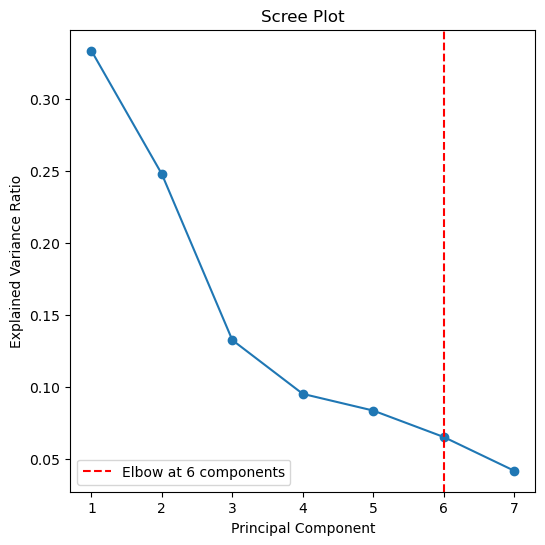

In [ ]:
# Standardize the features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(6, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')

# Identify the "elbow" point
# Visually inspect the plot to determine the number of components before the explained variance levels off.
cumulative_variance = np.cumsum(explained_variance_ratio)
elbow_index = np.where(cumulative_variance >= 0.95)[0][0] + 1  # a threshold (95% explained variance)

# Mark the "elbow" point on the plot
plt.axvline(x=elbow_index, color='red', linestyle='--', label=f'Elbow at {elbow_index} components')
plt.legend()

# Show the scree plot
plt.show()

In [ ]:
#Apply PCA for dimensionality reduction
pca = PCA(n_components=6)  # Select number of components
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance_ratio)

Explained Variance Ratios: [0.3335917  0.24785982 0.13257648 0.09522572 0.08362263 0.06527991]


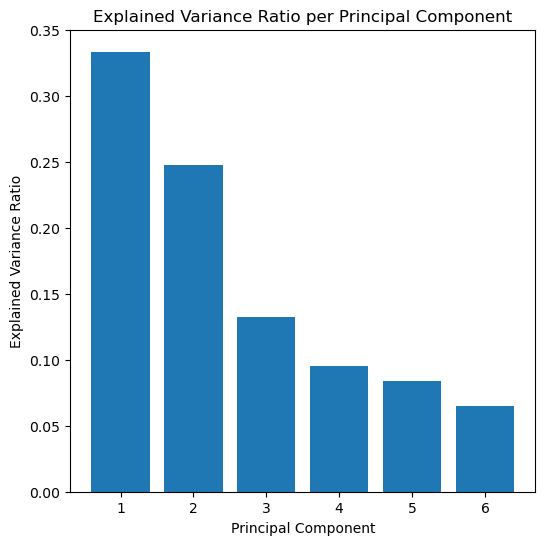

In [ ]:
plt.figure(figsize=(6,6))
plt.bar(range(1, 7), explained_variance_ratio, align="center")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio per Principal Component")
plt.show()

### Model Building with PCA Data

In [ ]:
# Train a Decision Tree classifier on reduced data
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)

tree_pca = DecisionTreeClassifier(random_state=42)
tree_pca.fit(X_train_pca, y_train)
y_pred_pca = tree_pca.predict(X_test_pca)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca)
recall_pca = recall_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca)

print("Accuracy with PCA-Reduced Data:", accuracy_pca)
print("Precision with PCA-Reduced Data:", precision_pca)
print("Recall with PCA-Reduced Data:", recall_pca)
print("F1 Score with PCA-Reduced Data:", f1_pca)

Accuracy with PCA-Reduced Data: 0.5714285714285714
Precision with PCA-Reduced Data: 0.5471698113207547
Recall with PCA-Reduced Data: 0.58
F1 Score with PCA-Reduced Data: 0.5631067961165048


## 3.2 Model Optimisation

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define a list of data transformers (scaling methods)
transformers = {
    'RobustScaler': RobustScaler(),
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler()
}

# Define a grid of hyperparameters for a Decision Tree Classifier
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

results = {}

for transformer_name, transformer in transformers.items():
    # Transform the data
    X_train_scaled = transformer.fit_transform(X_train)
    X_test_scaled = transformer.transform(X_test)

    # Create a Decision Tree classifier
    dtc = DecisionTreeClassifier()

    # Create the Grid Search with multiple scoring metrics
    grid_search = GridSearchCV(
        estimator=dtc,
        param_grid=param_grid,
        scoring={
            'accuracy': 'accuracy',
            'precision': 'precision',
            'recall': 'recall',
            'f1': 'f1',
        },
        cv=5,
        refit='accuracy')

    # Fit the grid search to your data
    grid_search.fit(X_train_scaled, y_train)

    # Access the best model
    best_model = grid_search.best_estimator_

    # Make predictions on the test data using the best model
    y_pred = best_model.predict(X_test_scaled)

    # Evaluate the model on the test data
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the results
    results[transformer_name] = {
        'Best Data Transformer': transformer_name,
        'Best Model': best_model,
        'Best Accuracy': accuracy,
        'Best Precision': precision,
        'Best Recall': recall,
        'Best F1 Score': f1
    }

# Print the results for both transformation methods
for transformer_name, result in results.items():
    print(f"Results for {transformer_name}:")
    print(f"Best Data Transformer: {result['Best Data Transformer']}")
    print(f"Best Model: {result['Best Model']}")
    print(f"Best Accuracy: {result['Best Accuracy']:.2f}")
    print(f"Best Precision: {result['Best Precision']:.2f}")
    print(f"Best Recall: {result['Best Recall']:.2f}")
    print(f"Best F1 Score: {result['Best F1 Score']:.2f}\n")

Results for RobustScaler:
Best Data Transformer: RobustScaler
Best Model: DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)
Best Accuracy: 0.56
Best Precision: 0.55
Best Recall: 0.44
Best F1 Score: 0.49

Results for StandardScaler:
Best Data Transformer: StandardScaler
Best Model: DecisionTreeClassifier(min_samples_leaf=4, min_samples_split=5)
Best Accuracy: 0.58
Best Precision: 0.57
Best Recall: 0.52
Best F1 Score: 0.54

Results for MinMaxScaler:
Best Data Transformer: MinMaxScaler
Best Model: DecisionTreeClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=10)
Best Accuracy: 0.62
Best Precision: 0.60
Best Recall: 0.58
Best F1 Score: 0.59



## 3.3 Markov Decision Process for Decision Optimisation

In [ ]:
# Define the states and actions
states = ['perfect', 'very good', 'good', 'poor', 'critical']
actions = ['minimum_payment', 'default_loan']

# Initialize Q-table with zeros
num_states = len(states)
num_actions = len(actions)
Q = np.zeros((num_states, num_actions))

# Define the transition probabilities
transition_probabilities = {
    'perfect': {
        'minimum_payment': {'very good': 0.9, 'good': 0.1},
        'default_loan': {'good': 0.1, 'poor': 0.9}
    },
    'very good': {
        'minimum_payment': {'good': 0.8, 'perfect': 0.2},
        'default_loan': {'good': 0.2, 'poor': 0.8}
    },
    'good': {
        'minimum_payment': {'perfect': 0.2, 'very good': 0.6, 'good': 0.2},
        'default_loan': {'very good': 0.3, 'good': 0.5, 'poor': 0.2}
    },
    'poor': {
        'minimum_payment': {'good': 0.1, 'poor': 0.7, 'critical': 0.2},
        'default_loan': {'poor': 0.4, 'critical': 0.6}
    },
    'critical': {
        'minimum_payment': {'critical': 1.0},
        'default_loan': {'critical': 1.0}
    }
}

# Define rewards
rewards = {
    'perfect': {'minimum_payment': 1, 'default_loan': -5},
    'very good': {'minimum_payment': 2, 'default_loan': -4},
    'good': {'minimum_payment': 3, 'default_loan': -3},
    'poor': {'minimum_payment': 0, 'default_loan': -8},
    'critical': {'minimum_payment': -10, 'default_loan': -10}
}

# Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate

# Q-learning algorithm
num_episodes = 1000
for _ in range(num_episodes):
    state = np.random.choice(states)  # Start in a random state
    while state != 'critical':  # Continue until a terminal state is reached
        if np.random.rand() < epsilon:
            action = np.random.choice(actions)  # Exploration
        else:
            action = actions[np.argmax(Q[states.index(state)])]  # Exploitation
        next_state = np.random.choice(list(transition_probabilities[state][action].keys()), p=list(transition_probabilities[state][action].values()))
        reward = rewards[state][action]
        Q[states.index(state)][actions.index(action)] += alpha * (reward + gamma * np.max(Q[states.index(next_state)]) - Q[states.index(state)][actions.index(action)])
        state = next_state

# Extract the optimal policy
optimal_policy = {}
for state_idx, state in enumerate(states):
    optimal_action_idx = np.argmax(Q[state_idx])
    optimal_policy[state] = actions[optimal_action_idx]

# Print the Q-table and optimal policy
print("Q-table:")
print(Q)
print("Optimal Policy:")
print(optimal_policy)

Q-table:
[[21.54442393  2.37343088]
 [22.91828307  0.92744192]
 [23.7000202  15.30656648]
 [ 4.57197748 -5.93779376]
 [ 0.          0.        ]]
Optimal Policy:
{'perfect': 'minimum_payment', 'very good': 'minimum_payment', 'good': 'minimum_payment', 'poor': 'minimum_payment', 'critical': 'minimum_payment'}


# Phase 4: Discussion and Interpretation

This phase will be included in the project report under results and discussion section.